# 1. Start Python and Check Versions

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.9.5 (default, May 18 2021, 14:42:02) [MSC v.1916 64 bit (AMD64)]
scipy: 1.7.0
numpy: 1.20.3
matplotlib: 3.4.2
pandas: 1.2.4
sklearn: 1.1.2


# 2. Load The Data

### 2.1 Import libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

pd.options.mode.chained_assignment = None

import seaborn as sns
import matplotlib.pyplot as plt


# !pip install missingno
import missingno as msno
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
#import pylib
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
import warnings
plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]
import warnings  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
from matplotlib.axes import Axes
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from collections import Counter
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import itertools
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, plot_roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



### 2.2 Load Dataset

In [3]:
#read csv file

strokedf = pd.read_csv("C:/Users/ELADL/iCloudDrive/Data Sciene/DS-Git/Data Science GIT/DataScience/data/stroke-data.csv")

# 3. Summarize the Dataset

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

### 3.1 Dimensions of Dataset

In [4]:
# df shape

strokedf.shape

(5110, 12)

In [5]:
# data in general

strokedf.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
#information about dataset. Type of data, Non-Null data and names of columns.

strokedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Variables definition:
- id: unique identifier.
- gender: This feature refers to the participant’s gender.
- age: This feature refers to the age of the participantswho
- hypertension: This feature refers to whether this participant is hypertensive (1) or
not(0).
- heart_disease: This feature refers to whether this participant suffers from heart
disease (1) or not(0).
- ever_married: This feature represents the marital status of the participants
- work_type: This feature represents the participant’swork status and has 4 categories-"children", "Govt_jov", "Never_worked", "Private" or "Self-employed".
- Residence_type:This feature represents the participant’s living status and has
2 categories "Rural" or "Urban".
- avg_glucose_level: This feature captures the participant’s average glucose
level.
- bmi: This feature captures the body mass index of the participants
- smoking_status: This feature captures the participant’s smoking status and has
4 categories: "formerly smoked", "never smoked", "smokes" or "Unknown".
- stroke: This feature represents if the participant previously had a stroke (1) or not (0)

# EDA and Data Cleansing


## Categorical Variable
<ul>
<li>gender</li>
<li>ever_married</li>
<li>work_type</li>
<li>Residence_type</li>
<li>smoking_status</li>
</ul>

# Numerical Variable
<ul>
<li>id</li>
<li>age</li>
<li>hypertension(High blood pressure)</li>
<li>heart_disease</li>
<li>avg_glucose_level</li>
<li>bmi</li>
<li>stroke</li>

### Notes:

The target variable,'stroke', seems to be a numerical variable, althought it is categorical since this column only includes 1 and 0(stroke or no stroke). These kinds of variables have to be considered categorical.
Same for "heart_disease" and "hypertension" 

In [7]:
# Chan

strokedf['heart_disease'] = strokedf['heart_disease'].astype(object)
strokedf['hypertension'] = strokedf['hypertension'].astype(object)


In [8]:
strokedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 479.2+ KB


In [9]:
# Categorial varןables df

strokedf_cat_columns = strokedf[['gender','ever_married','work_type','Residence_type','smoking_status','hypertension','heart_disease']].copy()

In [10]:
# Numerical variables df

strokedf_num_columns = strokedf[['age','avg_glucose_level','bmi']].copy()

### 3.3 Descriptive Statistics

In [11]:
# Statistical information

strokedf.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.0,5110.0,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,2.0,2.0,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,0.0,0.0,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,4612.0,4834.0,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,NaN,NaN,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,NaN,NaN,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,NaN,NaN,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


### Notes:

for 'avg_glucose_level' there is a  difference between mean and median is high  so we expect to have some outliers.
i will check it later in outliers section

In [12]:
# Checking unique values for each columne (feature)

strokedf.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [13]:
# Checknig target variable counts

strokedf['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [14]:
# Cheking ratio of outcome variable 

(strokedf.stroke.value_counts() / len(strokedf))*100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

### Notes:

I see that the target variable is unbalanced. i will handle this later with oversampling method

In [15]:
# Checking values for some categorial numbers

columns = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

for data in strokedf[columns]:
    print(strokedf[data].unique())

# we see that 

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [16]:
# Checking gender values

strokedf['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

### Notes:

I see "gender" has 3 types.. I will remove the "Other" from gender"

In [17]:
strokedf = strokedf[strokedf['gender'] != 'Other']

In [18]:
# Checking the gender types after removing the row

strokedf['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [19]:
# I can remove the "ID" columne from df as well as it has no relation.

strokedf.drop("id" , axis=1, inplace =True)

In [20]:
# Changing age variable to int from float

strokedf['age'] = strokedf['age'].astype(int)

In [21]:
# Checking new data type

strokedf['age'].dtypes

dtype('int32')

# 4. Data Visualization

## 4.1 Univariate Plots
We start with some univariate plots, that is, plots of each individual variable, 
than i will analyze relationships between numerical and categorical variables

### Plotting numerical Variables

In [22]:
strokedf_num_columns.columns

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

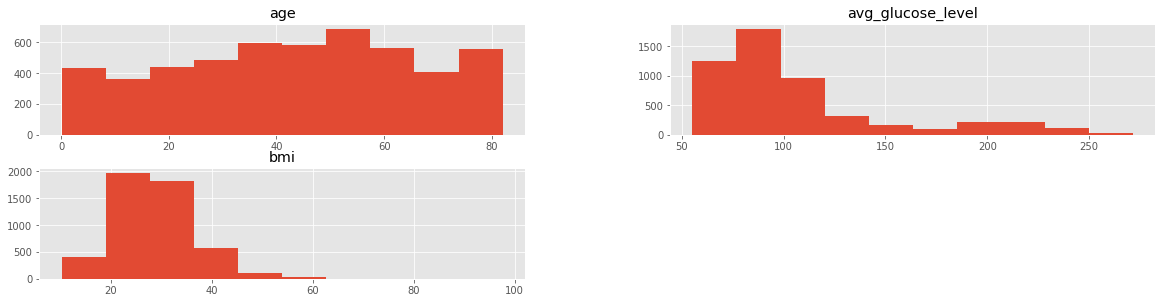

In [23]:
strokedf_num_columns.hist(figsize=(20,10),layout=(4,2))

### Plotting categorial Variables

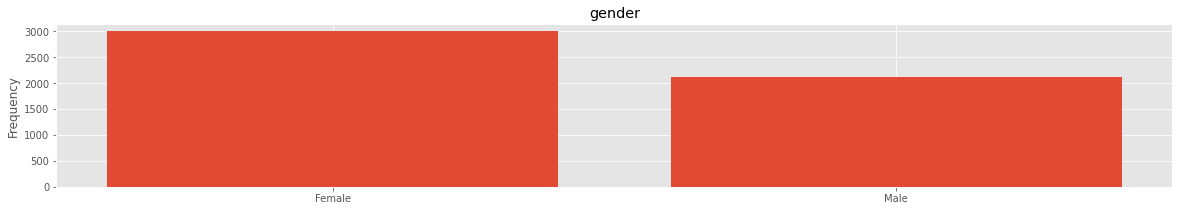

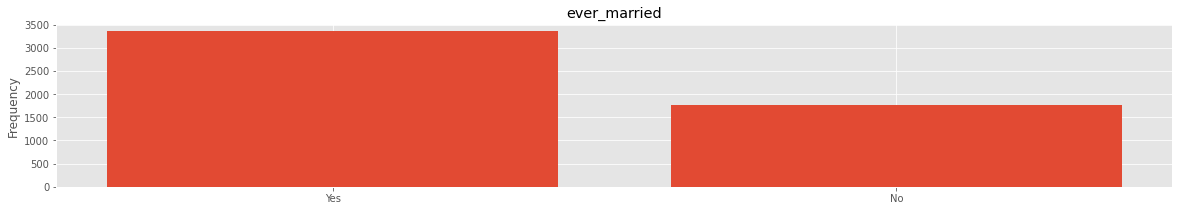

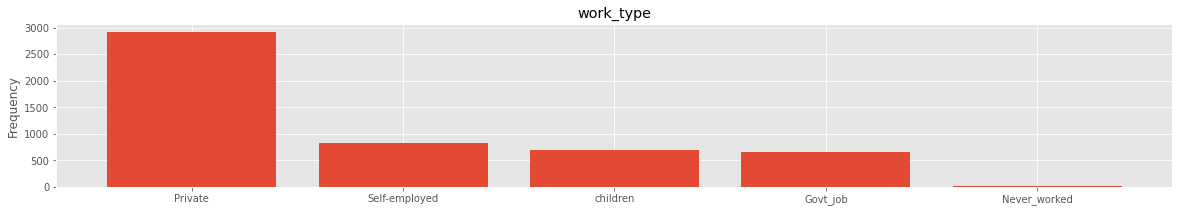

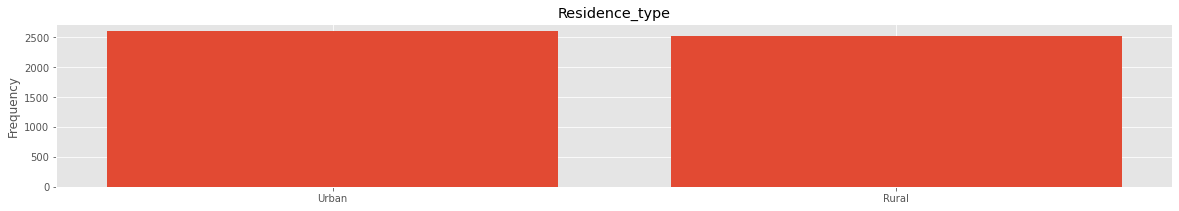

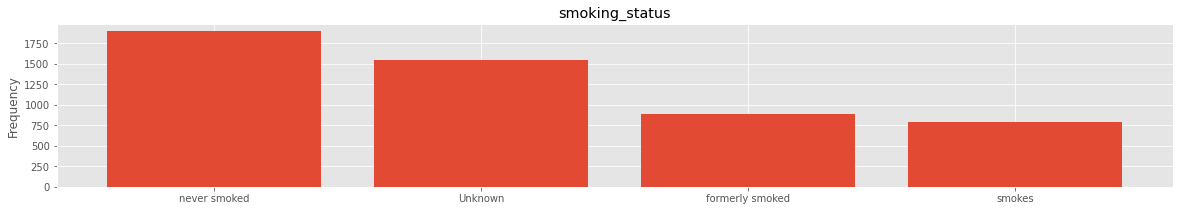

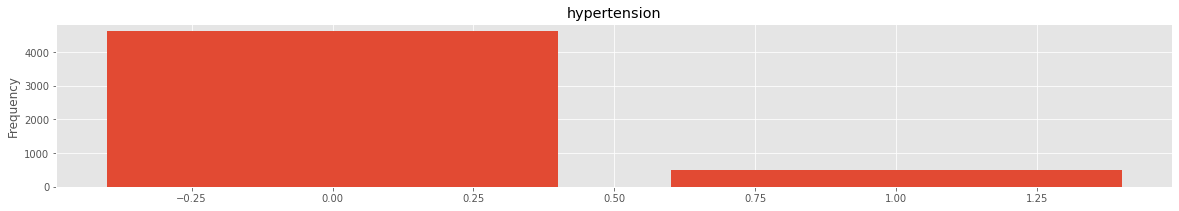

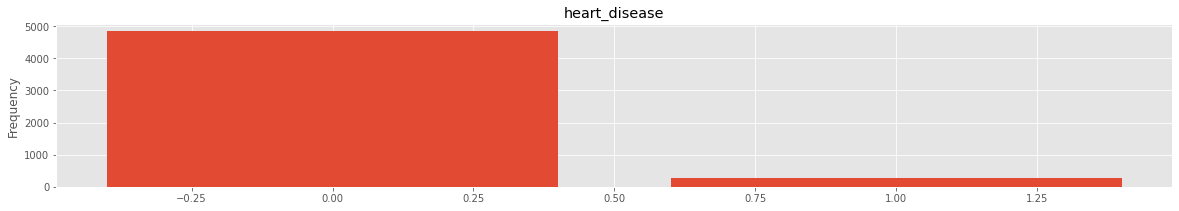

In [24]:
# ploting categorial variables


for i in strokedf_cat_columns:
    var = strokedf[i]  
    varValue = var.value_counts()    
    plt.figure(figsize = (20,3))
    plt.bar(varValue.index,varValue)
    plt.ylabel("Frequency")
    plt.title(i)
    plt.show()

### Notes:




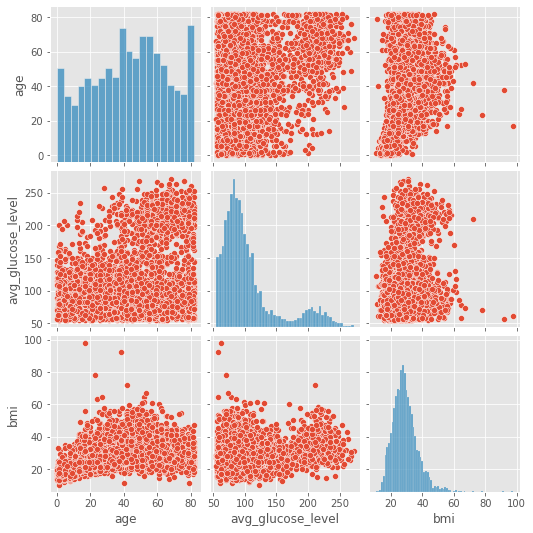

In [25]:
import seaborn as sns

figsize=(20, 10)

sns.pairplot(strokedf_num_columns)

### Notes

i see some small corr between age and bmi and avg clucose level

## Analyzing relationships between Variables vs Target 'stroke'

### Categorial Variables vs Target 'stroke'

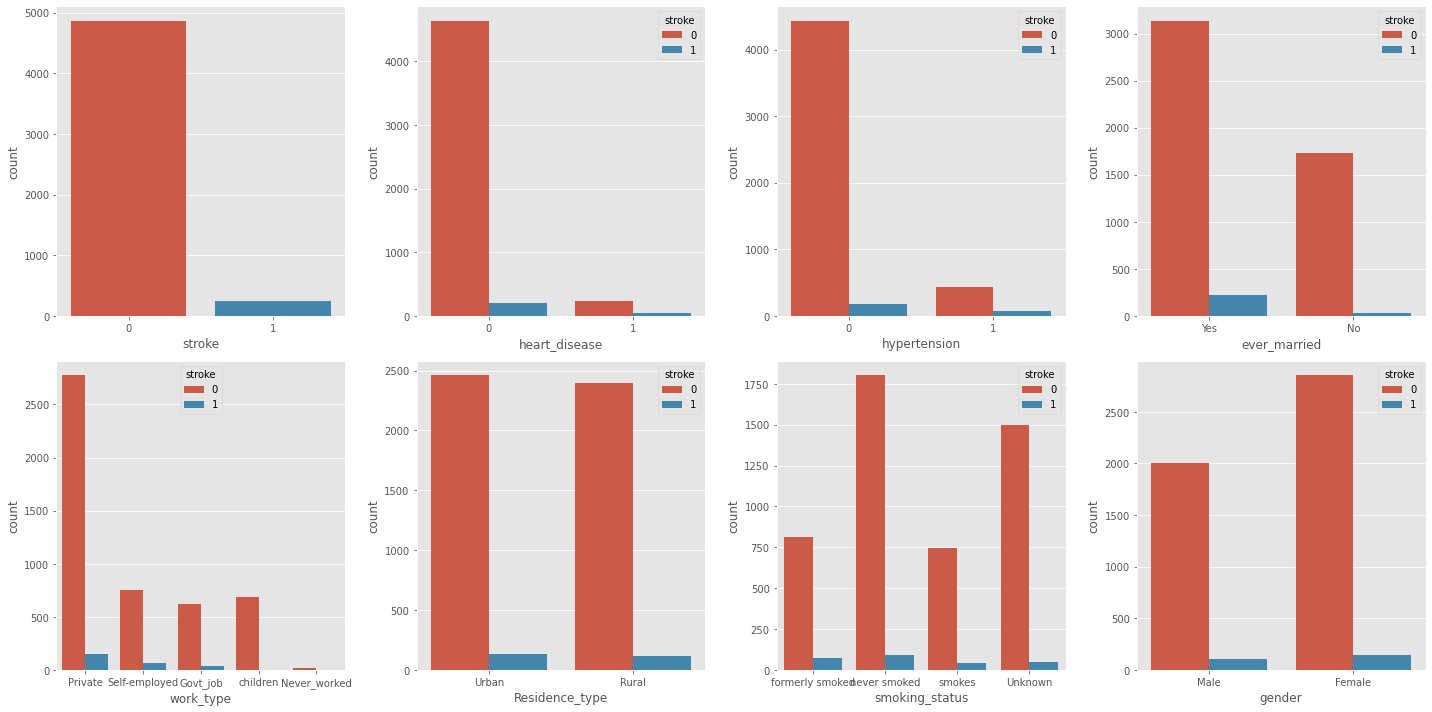

In [26]:
f, axes = plt.subplots(2, 4, figsize=(20, 10))
stroke = sns.countplot(x='stroke', data=strokedf, ax=axes[0][0])
heart_disease = sns.countplot(x='heart_disease', hue="stroke", data=strokedf, ax=axes[0][1])
hypertension = sns.countplot(x='hypertension', hue="stroke", data=strokedf, ax=axes[0][2])
ever_married = sns.countplot(x='ever_married', hue="stroke", data=strokedf, ax=axes[0][3])
work_type = sns.countplot(x='work_type', hue="stroke", data=strokedf, ax=axes[1][0])
Residence_type = sns.countplot(x='Residence_type', hue="stroke", data=strokedf, ax=axes[1][1])
smoking_status = sns.countplot(x='smoking_status', hue="stroke", data=strokedf, ax=axes[1][2])
gender = sns.countplot(x='gender', hue="stroke", data=strokedf, ax=axes[1][3])
plt.tight_layout()

#### Notes:
1. There are no stroke for those who never worked
2. More chance to stroke for those that had heart disease
3. More chance to stroke for those that had hypertension
4. More chance to stroke for those that had married
5. More chance to stroke for those that work type is privte .
6. those that never smoked has a chnace like thise who smoke
7. More chance to stroke for those that live in Urban

### Numerical values

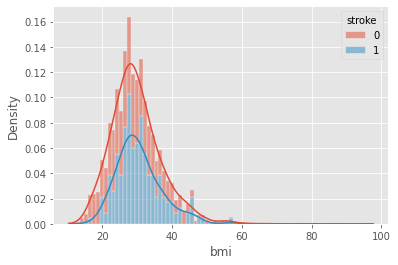

In [27]:
# Plotting bmi VS stroke

sns.histplot(data=strokedf, x='bmi', hue='stroke', multiple='stack',kde= True,stat="density", common_norm=False)
plt.show()

### Notes:

I see high density aound age 25-35
starnge..

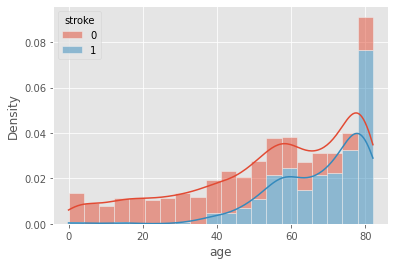

In [28]:
# Plotting age VS stroke

sns.histplot(data=strokedf, x='age', hue='stroke', multiple='stack',kde= True,stat="density", common_norm=False)
plt.show()

### Notes:

The density of people with age less than 40 suffered less from stroke.

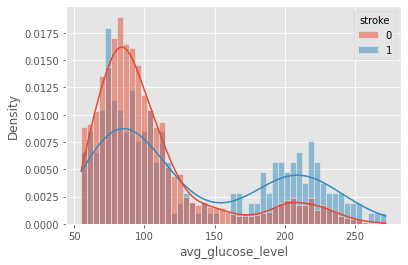

In [29]:
# Plotting avg_glucose_level VS stroke

sns.histplot(data=strokedf, x='avg_glucose_level', hue='stroke',kde= True,stat="density", common_norm=False)
plt.show()

### Notes:
1. Strange . there are 2 distributions here from 55 -160 , 170-..
2. according the density, people with avg_glucose_level more than 160 , suffered more from stroke.

#### Some 3D Plot for bmi ,avg_glucose_level and stroke :

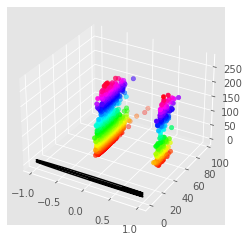

In [30]:
fig = plt.figure()
ax = plt.axes(projection="3d")

def show3D_transation_data(training_set, x_points, y_points, z_points):
    z_line = np.linspace(0, 15, 1000)
    x_line = np.sin(z_line)
    y_line = np.cos(z_line)
    ax.plot3D(x_line, y_line, z_line, 'black')
    ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
    
    
show3D_transation_data(strokedf, strokedf['stroke'],strokedf['bmi'], strokedf['avg_glucose_level'])

### Notes:

I see a outliers in both bmi and avg_glucose_level

## Checking correlations

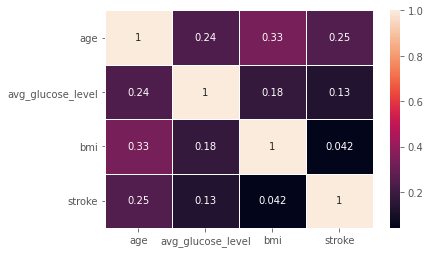

In [31]:
corr = strokedf.corr()
sns.heatmap(corr, annot=True, linewidths=0.5)
plt.show()

In [32]:
strokedf.corr()['stroke'].sort_values(ascending=False)[1:]

age                  0.245109
avg_glucose_level    0.131991
bmi                  0.042341
Name: stroke, dtype: float64

### Notes

stroke has the most correlation with age ans some small correlation with avg_glucose_level


In [33]:
strokedf.corr()['age'].sort_values(ascending=False)[1:]

bmi                  0.333655
stroke               0.245109
avg_glucose_level    0.238212
Name: age, dtype: float64

### Notes
 
age has correltion with bmi , stroke and avg glucose level

### Checking chi-square for - association between categorial varibales

In [34]:
#Use Cramer's V with researchpy package

#!pip install researchpy
import researchpy

In [35]:
# Getting p-values to check significant of categorial variables

Categories = list(strokedf_cat_columns.columns.values)

cross_tabs = {}
resu = {}
for i in Categories:
    cross_tabs[i], resu[i] = researchpy.crosstab(strokedf['stroke'], strokedf[(i)],test='chi-square')

In [36]:
resu

{'gender':                 Chi-square test  results
 0  Pearson Chi-square ( 1.0) =    0.4213
 1                    p-value =    0.5163
 2               Cramer's phi =    0.0091,
 'ever_married':                 Chi-square test  results
 0  Pearson Chi-square ( 1.0) =   59.9221
 1                    p-value =    0.0000
 2               Cramer's phi =    0.1083,
 'work_type':                 Chi-square test  results
 0  Pearson Chi-square ( 4.0) =   49.1591
 1                    p-value =    0.0000
 2                 Cramer's V =    0.0981,
 'Residence_type':                 Chi-square test  results
 0  Pearson Chi-square ( 1.0) =    1.2139
 1                    p-value =    0.2706
 2               Cramer's phi =    0.0154,
 'smoking_status':                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =   29.2257
 1                    p-value =    0.0000
 2                 Cramer's V =    0.0756,
 'hypertension':                 Chi-square test  results
 0  Pearson Chi-square

### Notes:
Following variables have small p-value in Chi-square test so they are significat to stroke

- ever_married
- work_type
- smoking_status
- hypertension
- heart disease

in addition, all cramers results shows very small association between the two variables
    

# 4. Reports

### sweetviz report

!pip install sweetviz

import sweetviz as sv

strokedf['stroke'] = strokedf['stroke'].astype('bool')

#analyzing the dataset
advert_report = sv.analyze([strokedf,'Train'],target_feat='stroke',pairwise_analysis='off')
#display the report
advert_report.show_html('df_train.html')

### pandas_profiling report

!pip install pandas_profiling

In [37]:
from pandas_profiling import ProfileReport

strokedf['stroke'] = strokedf['stroke'].astype('category')

profile = ProfileReport(strokedf, minimal=True)
profile.to_file("output.html")

profile.to_file("C:/Users/ELADL/iCloudDrive/Data Sciene/DS-Git/Data Science GIT/DataScience/data/profile-report.csv")

# 5. Analyse outliers and missing values

## 5.1 Missing Values

#### 5.1.1Analize Missing values and unique values

In [38]:
def analize(df):
    analysis = pd.DataFrame(df.dtypes,columns=['d_types'])
    analysis = analysis.reset_index()
    analysis = analysis.rename(columns={"index": "Col_name"})
    analysis['Missing_values'] = df.isnull().sum().values
    analysis['Unique_values'] = df.nunique().values
    return analysis

In [39]:
analize(strokedf)


,Col_name,d_types,Missing_values,Unique_values
0,gender,object,0,2
1,age,int32,0,83
2,hypertension,object,0,2
3,heart_disease,object,0,2
4,ever_married,object,0,2
5,work_type,object,0,5
6,Residence_type,object,0,2
7,avg_glucose_level,float64,0,3978
8,bmi,float64,201,418
9,smoking_status,object,0,4


## Notes:
I see that bmi has 201 missing values

In [40]:
# Columns mith missing valius count

strokedf.isnull().sum(axis = 0).sort_values(ascending=False)

bmi                  201
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [41]:
# find the rows with missing data in bmi

strokedf[strokedf.bmi.isna()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [42]:
# Checking number of "stroke" from the missing rows

strokedf[strokedf.bmi.isna()]['stroke'].value_counts()

0    161
1     40
Name: stroke, dtype: int64

# Notes:
there is around 25% of stroke from the missing rows, so i cannot delete them.

In [43]:
# Percentage of missing values in df

s2 = strokedf.isna().mean().sort_values(ascending=False)
print (s2)

bmi                  0.039342
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
smoking_status       0.000000
stroke               0.000000
dtype: float64


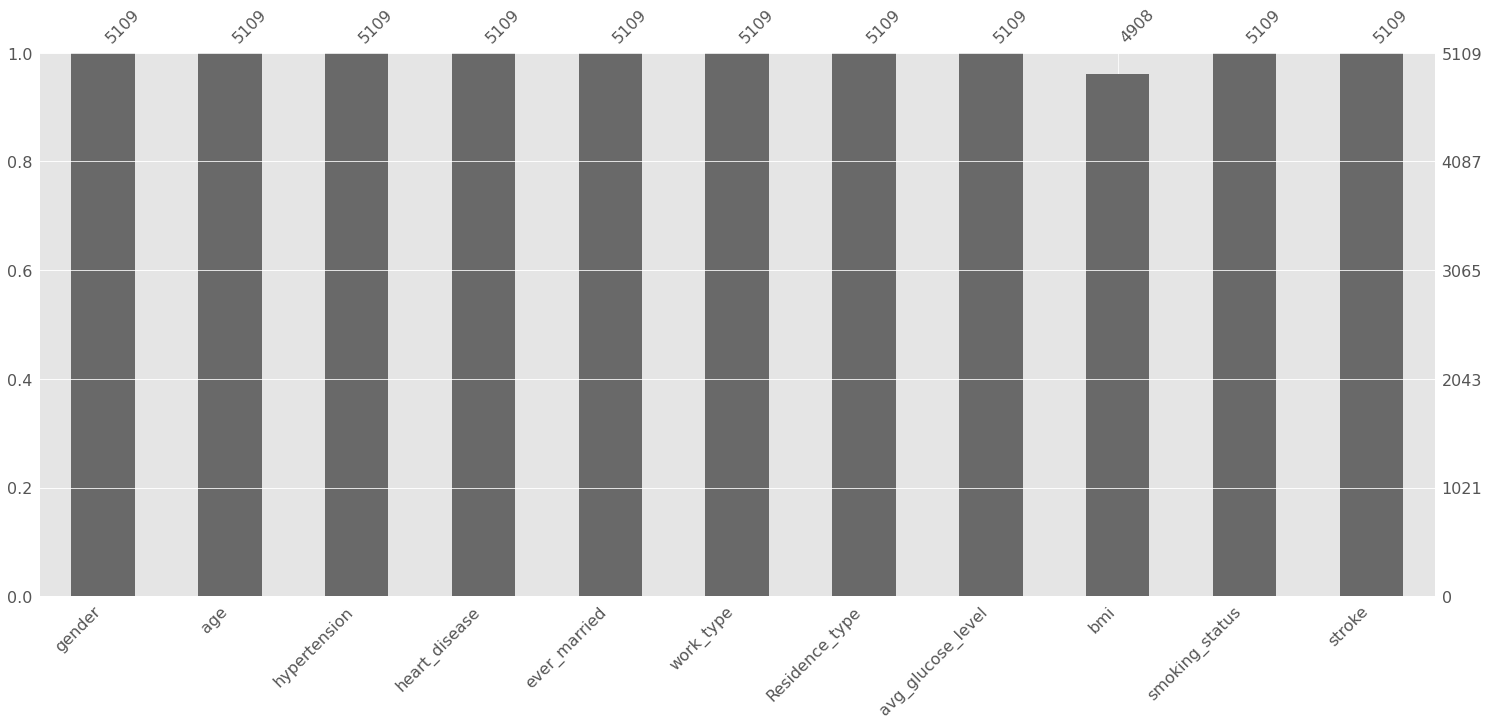

In [44]:
# For missing values, there a library named "missingno", which was imported at the beginning. This library provides visual analysis for missing values
msno.bar(strokedf)
plt.show()

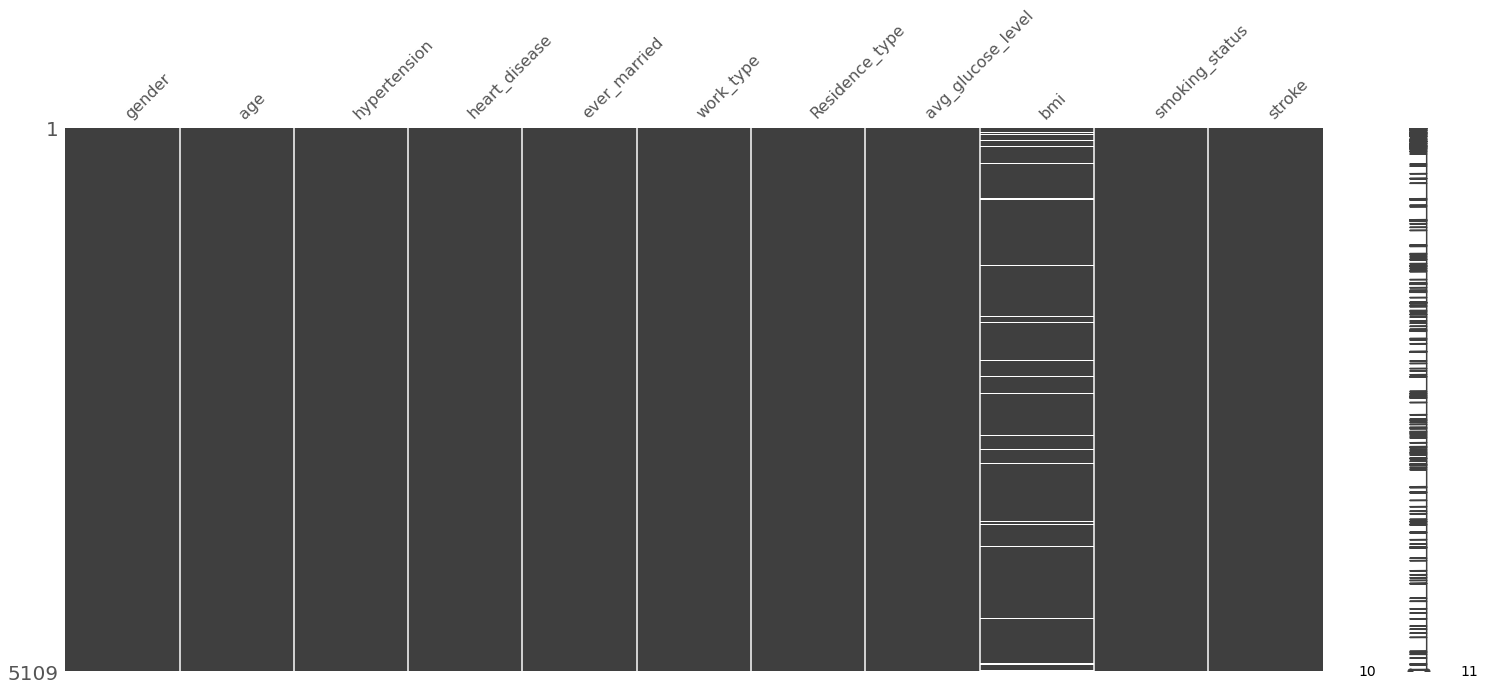

In [45]:
msno.matrix(strokedf)
plt.show()

### Notes:
I will deal with the missing values in the "Pre-processing (Solve Outliers and Missing Values)" sction

# Outliers

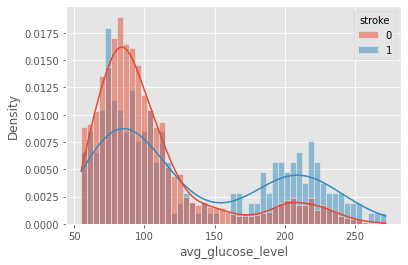

In [46]:
# Plotting histogram avg_glucose_level VS stroke

sns.histplot(data=strokedf, x='avg_glucose_level', hue='stroke',kde= True,stat="density", common_norm=False)
plt.show()

<AxesSubplot:xlabel='avg_glucose_level'>

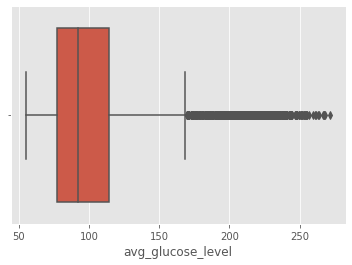

In [47]:
# chcking avg_glucose_level outliers via boxplot

sns.boxplot(x=strokedf['avg_glucose_level'])

### Notes:

I see that avg_glucose_level has outliers from ~170

<AxesSubplot:xlabel='bmi'>

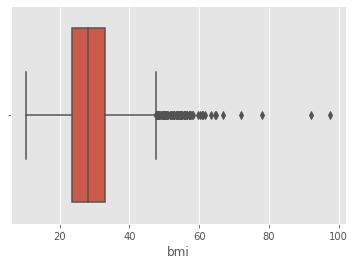

In [48]:
# chcking bmi outliers via boxplot

sns.boxplot(x=strokedf['bmi'])

### Notes:

I see that bmi has outliers from ~45

### quartiles
Defining Q3 and Q1 as 75th and 25th

In [49]:
#quartiles -defining Q3 and Q1 as 75th and 25t

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [50]:
num_cols = ['avg_glucose_level', 'bmi']
for i in strokedf[num_cols]:
    print("Thresholds of {} : ({:.2f}, {:.2f})".format(i, *outlier_thresholds(strokedf,i)))

Thresholds of avg_glucose_level : (21.96, 169.37)
Thresholds of bmi : (9.10, 47.50)


In [51]:
# Observe the outliers, it can be functioned as well, but we don't need here
low, up = outlier_thresholds(strokedf, "bmi")
strokedf[((strokedf["bmi"] < low) | (strokedf["bmi"] > up))]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,Female,52,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
113,Female,45,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,Female,47,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,Female,74,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
270,Female,57,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
4858,Female,43,0,0,Yes,Private,Urban,100.88,47.6,smokes,0
4906,Female,53,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0
4952,Male,51,1,0,Yes,Self-employed,Rural,211.83,56.6,never smoked,0
5009,Female,50,0,0,Yes,Self-employed,Rural,126.85,49.5,formerly smoked,0


For bmi, (Q3 + 1.5xIQR) found as 47.50, the upper of these will be considered an outlier. 

In [52]:
# Observe the outliers, it can be functioned as well, but we don't need here
low, up = outlier_thresholds(strokedf, "avg_glucose_level")
strokedf[((strokedf["avg_glucose_level"] < low) | (strokedf["avg_glucose_level"] > up))]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
5062,Female,82,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5063,Male,39,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0
5064,Male,70,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0


For bmi, (Q3 + 1.5xIQR) found as 169.36, the upper of these will be considered an outlier.

# Pre-processing (Solve Outliers and Missing Values)

## Handling missing values

#### Notes:
Here, my approach will be to imputate the missing values with KNN

In [53]:
def missing_values_table(dataframe, na_name=False):
    # only take missing columns
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)  # number of missing value
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False) # ratio
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])  # make table
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [54]:
na_cols = missing_values_table(strokedf, na_name=True) # columns that includes missing values
n_miss = strokedf[na_cols].isnull().sum() # number of missing values on variables

     n_miss  ratio
bmi     201   3.93


In [55]:
na_cols

['bmi']

In [56]:
n_miss

bmi    201
dtype: int64

### KNN Imputation for bmi feature

In [57]:
# standardization
scaler = MinMaxScaler()

# standardized bmi  columns
strokedf[na_cols] = pd.DataFrame(scaler.fit_transform(strokedf[na_cols]), columns=strokedf[na_cols].columns)
print(strokedf[na_cols].head())

# fill with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
strokedf[na_cols] = pd.DataFrame(imputer.fit_transform(strokedf[na_cols]), columns = strokedf[na_cols].columns)
print(strokedf[na_cols].head())

# from standardized to non-standardized 
strokedf[na_cols] = pd.DataFrame(scaler.inverse_transform(strokedf[na_cols]), columns = strokedf[na_cols].columns)
print(strokedf[na_cols].head())

        bmi
0  0.301260
1       NaN
2  0.254296
3  0.276060
4  0.156930
        bmi
0  0.301260
1  0.213028
2  0.254296
3  0.276060
4  0.156930
         bmi
0  36.600000
1  28.897371
2  32.500000
3  34.400000
4  24.000000


In [58]:
strokedf.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.897371,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59,0,0,Yes,Private,Rural,76.15,28.897371,Unknown,1
9,Female,78,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [59]:
strokedf.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  2
smoking_status       0
stroke               0
dtype: int64

In [60]:
# find the rows with missing data in bmi

strokedf = strokedf[strokedf['bmi'].notna()]
strokedf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.897371,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [61]:
strokedf.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

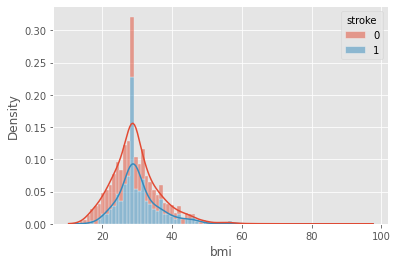

In [62]:
# Plotting bmi VS stroke after KNN imputation

sns.histplot(data=strokedf, x='bmi', hue='stroke', multiple='stack',kde= True,stat="density", common_norm=False)
plt.show()

In [63]:
strokedf.describe()['bmi']

count    5107.000000
mean       28.899034
std         7.696766
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

## Handling  Outliers

IQR: We find the thresholds on analysis using IQR calculation. Now, re-assignment with thresholds will be done. It means the outliers will be replaced with upper and lower thresholds. Why this kind of process is made is based on preventing the loss of data. Especially in the small dataset, each data is significant.

In the literature, the upper limit is taken as 75% quantile(Q3), and a higher value than 1.5xQ3 will be replaced this threshold, a similar process is done with the lower value that is lower than 1.5xQ1, where Q1 is 25% quantile. We can also use quantiles as 5 by 95 because deleting or filling according to 25-75 would create a serious data loss and residue, we would add noise ourselves and create problems. Hence, the proportion of these depends according to the problems and datasets. If tree methods are used, not to touch outliers may be chosen, or approaching unacceptable outliers a shave from the end may be implemented.
In the analysis part, thresholds have been found with the function "outlier_thresholds". Now, write a function that takes these thresholds and makes re-assignment to outliers.

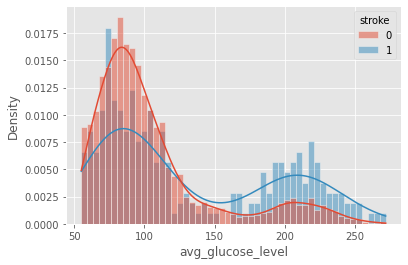

In [64]:
# Plotting avg_glucose_level VS stroke

sns.histplot(data=strokedf, x='avg_glucose_level', hue='stroke',kde= True,stat="density", common_norm=False)
plt.show()

### Conclution:
I will not remove the avg glocuse level outliers since they are importemnt in this case to predict stroke

In [65]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [66]:
cols = ['bmi' ]

In [67]:
for col in cols:
    replace_with_thresholds(strokedf, col)

In [68]:
# after re-assignment
strokedf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5107.0,43.216957,22.638967,0.00,25.000,45.00,61.00,82.00
avg_glucose_level,5107.0,106.132706,45.285108,55.12,77.235,91.88,114.07,271.74
bmi,5107.0,28.727309,7.118372,10.30,23.800,28.40,32.80,46.30
stroke,5107.0,0.048757,0.215380,0.00,0.000,0.00,0.00,1.00


As it can be seen, min, max, event mean, and std values have changed according to thresholds. Solution of outliers has been completed with this process.



## Checking outliers after IQR

<AxesSubplot:xlabel='bmi'>

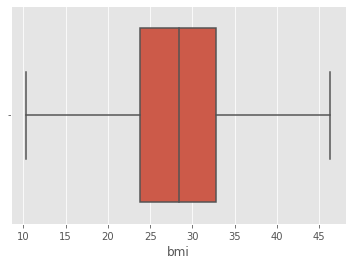

In [69]:
sns.boxplot(x=strokedf['bmi'])

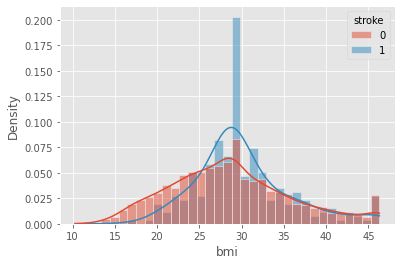

In [70]:
# Plotting avg_glucose_level VS stroke

sns.histplot(data=strokedf, x='bmi', hue='stroke',kde= True,stat="density", common_norm=False)
plt.show()

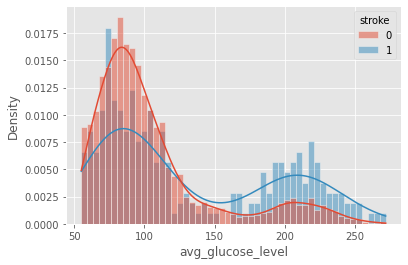

In [71]:
# Plotting avg_glucose_level VS stroke

sns.histplot(data=strokedf, x='avg_glucose_level', hue='stroke',kde= True,stat="density", common_norm=False)
plt.show()

# Feature Extraction

### BMI Notes:

i will add new column - bmi_level whhich represent the bmi levels

In [72]:
def bmi_level(x):
    if x < 18.5 : return "UnderWeight"
    elif 18.5 < x < 25: return "Healthy"
    elif 25 < x < 30: return "OverWeight"
    else: return "Obese"

In [73]:
strokedf["bmi_group"] = strokedf.bmi.apply(bmi_level)

In [74]:
strokedf["bmi_group"].value_counts()

Obese          1932
OverWeight     1610
Healthy        1229
UnderWeight     336
Name: bmi_group, dtype: int64

In [75]:
strokedf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_group
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Obese
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.897371,never smoked,1,OverWeight
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Obese
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Obese
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Healthy


### avg_glucose_level Notes:

i will add new column - avg_glucose_level_group which represent the avg_glucose_level levels

In [76]:
def avg_glucose_level(x):
    if x < 72 : return "low"
    elif 72 < x < 100: return "Healthy"
    elif 100 < x < 126: return "Risk"
    elif 126 < x < 200: return "High"
    else: return "Very-high"

In [77]:
strokedf["avg_glucose_level_group"] = strokedf.avg_glucose_level.apply(avg_glucose_level)

In [78]:
strokedf["avg_glucose_level_group"].value_counts()

Healthy      2241
Risk          998
low           888
High          545
Very-high     435
Name: avg_glucose_level_group, dtype: int64

In [79]:
strokedf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_group,avg_glucose_level_group
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Obese,Very-high
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.897371,never smoked,1,OverWeight,Very-high
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Obese,Risk
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Obese,High
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Healthy,High


### Age Notes:

i will add new column - age_level which represent the age levels

In [80]:
def age_level(x):
    if x <= 13 : return "Child"
    elif 13 < x < 20: return "Teenage"
    elif 20 <= x < 60: return "Adult"
    else: return "Old"

In [81]:
strokedf['age_level'] = strokedf['age'].apply(age_level)

In [82]:
strokedf['age_level'].value_counts()

Adult      2765
Old        1376
Child       645
Teenage     321
Name: age_level, dtype: int64

In [83]:
strokedf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_group,avg_glucose_level_group,age_level
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Obese,Very-high,Old
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.897371,never smoked,1,OverWeight,Very-high,Old
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Obese,Risk,Old
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Obese,High,Adult
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Healthy,High,Old


# One hot encoding - categorial variables

In [84]:
# one hot encoding all the categories data and getting final dataset

finaldf=pd.get_dummies(strokedf, columns=['gender','ever_married','work_type','Residence_type','smoking_status','bmi_group','avg_glucose_level_group','age_level'])


In [85]:
finaldf.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,bmi_group_UnderWeight,avg_glucose_level_group_Healthy,avg_glucose_level_group_High,avg_glucose_level_group_Risk,avg_glucose_level_group_Very-high,avg_glucose_level_group_low,age_level_Adult,age_level_Child,age_level_Old,age_level_Teenage
0,67,0,1,228.69,36.600000,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
1,61,0,0,202.21,28.897371,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,80,0,1,105.92,32.500000,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,49,0,0,171.23,34.400000,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,79,1,0,174.12,24.000000,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [86]:
# Movivng stroke feature to the end

finaldf = finaldf.drop('stroke',axis=1) 
finaldf['stroke'] = strokedf['stroke']

In [87]:
finaldf.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,...,avg_glucose_level_group_Healthy,avg_glucose_level_group_High,avg_glucose_level_group_Risk,avg_glucose_level_group_Very-high,avg_glucose_level_group_low,age_level_Adult,age_level_Child,age_level_Old,age_level_Teenage,stroke
0,67,0,1,228.69,36.600000,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,61,0,0,202.21,28.897371,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,80,0,1,105.92,32.500000,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
3,49,0,0,171.23,34.400000,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,79,1,0,174.12,24.000000,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1


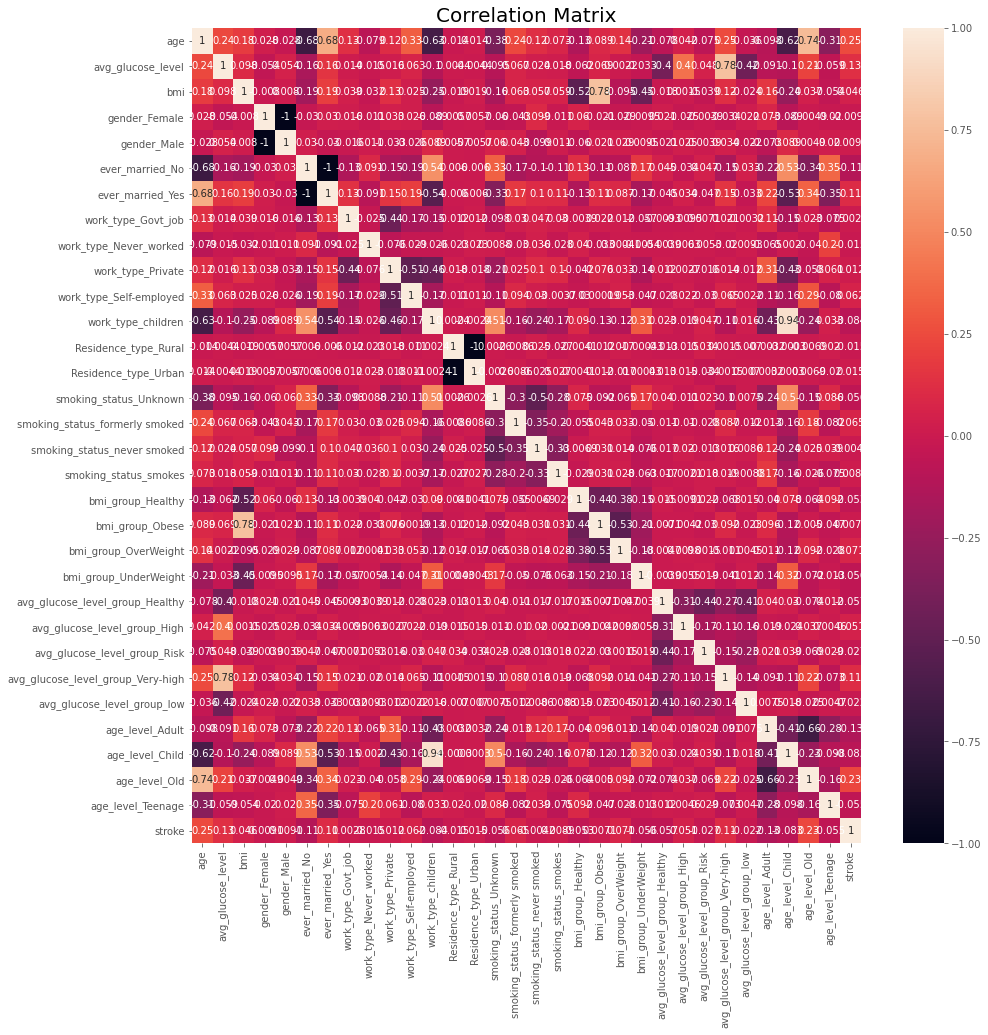

In [88]:
#Correlation of all features after label encoding

plt.figure(figsize=(15, 15))
sns.heatmap(finaldf.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [89]:
finaldf.corr()['stroke'].sort_values(ascending=False)[1:]

age                                  0.245132
age_level_Old                        0.233443
avg_glucose_level                    0.132057
avg_glucose_level_group_Very-high    0.113320
ever_married_Yes                     0.108376
bmi_group_OverWeight                 0.071432
smoking_status_formerly smoked       0.064792
work_type_Self-employed              0.062115
avg_glucose_level_group_High         0.051322
bmi                                  0.045629
Residence_type_Urban                 0.015416
work_type_Private                    0.011917
gender_Male                          0.009098
smoking_status_smokes                0.008883
bmi_group_Obese                      0.007129
work_type_Govt_job                   0.002760
smoking_status_never smoked         -0.004231
gender_Female                       -0.009098
work_type_Never_worked              -0.014891
Residence_type_Rural                -0.015416
avg_glucose_level_group_low         -0.022301
avg_glucose_level_group_Risk      

In [90]:
# Scaling numerical variables

In [91]:
sc = StandardScaler()

In [92]:
num_d = ['age','avg_glucose_level','bmi']

In [93]:
finaldf['age'] = finaldf['age'].astype(int)

In [94]:
 num_d = finaldf[['age','avg_glucose_level','bmi']].copy()

In [95]:
num_d

,age,avg_glucose_level,bmi
0,67,228.69,36.600000
1,61,202.21,28.897371
2,80,105.92,32.500000
3,49,171.23,34.400000
4,79,174.12,24.000000
...,...,...,...
5103,18,82.85,40.000000
5104,13,103.08,30.600000
5105,80,83.75,25.600000
5106,81,125.20,26.200000


In [96]:
finaldf[num_d.columns] = sc.fit_transform(num_d)

In [97]:
finaldf.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,...,avg_glucose_level_group_Healthy,avg_glucose_level_group_High,avg_glucose_level_group_Risk,avg_glucose_level_group_Very-high,avg_glucose_level_group_low,age_level_Adult,age_level_Child,age_level_Old,age_level_Teenage,stroke
0,1.050639,0,1,2.706614,1.106076,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,0.785583,0,0,2.121817,0.023893,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,1.624926,0,1,-0.004698,0.530045,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
3,0.255471,0,0,1.437640,0.796986,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1.580750,1,0,1.501464,-0.664165,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1


In [98]:
finaldf.describe()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,...,avg_glucose_level_group_Healthy,avg_glucose_level_group_High,avg_glucose_level_group_Risk,avg_glucose_level_group_Very-high,avg_glucose_level_group_low,age_level_Adult,age_level_Child,age_level_Old,age_level_Teenage,stroke
count,5.107000e+03,5.107000e+03,5.107000e+03,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,...,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000,5107.000000
mean,-1.168702e-16,1.446964e-16,4.730459e-17,0.586058,0.413942,0.343842,0.656158,0.128451,0.004308,0.572352,...,0.438809,0.106716,0.195418,0.085177,0.173879,0.541414,0.126297,0.269434,0.062855,0.048757
std,1.000098e+00,1.000098e+00,1.000098e+00,0.492587,0.492587,0.475036,0.475036,0.334624,0.065499,0.494786,...,0.496290,0.308782,0.396561,0.279173,0.379043,0.498331,0.332217,0.443709,0.242726,0.215380
min,-1.909150e+00,-1.126589e+00,-2.588951e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.047514e-01,-6.381907e-01,-6.922639e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.876762e-02,-3.147636e-01,-4.598543e-02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.855828e-01,1.752910e-01,5.721940e-01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.713278e+00,3.657350e+00,2.468881e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


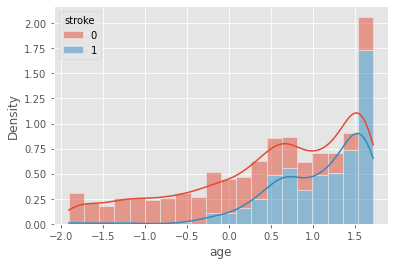

In [99]:
# Plotting age VS stroke

sns.histplot(data=finaldf, x='age', hue='stroke', multiple='stack',kde= True,stat="density", common_norm=False)
plt.show()

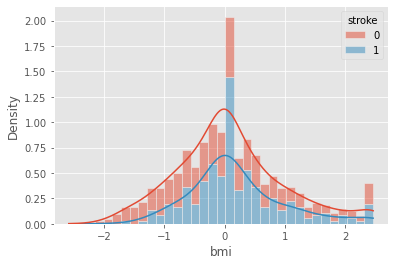

In [100]:
# Plotting bmi VS stroke

sns.histplot(data=finaldf, x='bmi', hue='stroke', multiple='stack',kde= True,stat="density", common_norm=False)
plt.show()

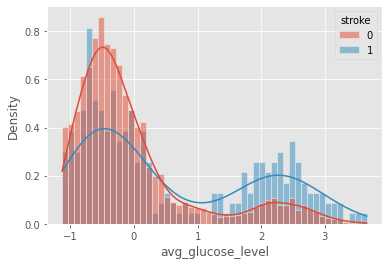

In [101]:
# Plotting avg_glucose_level VS stroke

sns.histplot(data=finaldf, x='avg_glucose_level', hue='stroke',kde= True,stat="density", common_norm=False)
plt.show()

In [102]:
finaldf.corr()['stroke'].sort_values(ascending=False)[1:]

age                                  0.245132
age_level_Old                        0.233443
avg_glucose_level                    0.132057
avg_glucose_level_group_Very-high    0.113320
ever_married_Yes                     0.108376
bmi_group_OverWeight                 0.071432
smoking_status_formerly smoked       0.064792
work_type_Self-employed              0.062115
avg_glucose_level_group_High         0.051322
bmi                                  0.045629
Residence_type_Urban                 0.015416
work_type_Private                    0.011917
gender_Male                          0.009098
smoking_status_smokes                0.008883
bmi_group_Obese                      0.007129
work_type_Govt_job                   0.002760
smoking_status_never smoked         -0.004231
gender_Female                       -0.009098
work_type_Never_worked              -0.014891
Residence_type_Rural                -0.015416
avg_glucose_level_group_low         -0.022301
avg_glucose_level_group_Risk      

### Notes:

I see that there are no real significant variables to stroke.
I will have to select varibales in a different way

## Random Forest for Unbalanced 'Stroke' target variable

In [103]:
finaldf['stroke'] = finaldf['stroke'].astype('category')

In [104]:
# Selecting X and y

X = finaldf.drop('stroke',axis=1)
y = finaldf['stroke'].copy()

In [105]:
X.shape,y.shape

((5107, 33), (5107,))

In [106]:
# Split train and dev

X_train, X_dev, y_train, y_dev = train_test_split(X,y,test_size=0.20,random_state=2)

In [107]:
# Concating X and Y

df_train_forBalanced = pd.concat([X_train, y_train], axis=1)

In [108]:
df_train_forBalanced.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,...,avg_glucose_level_group_Healthy,avg_glucose_level_group_High,avg_glucose_level_group_Risk,avg_glucose_level_group_Very-high,avg_glucose_level_group_low,age_level_Adult,age_level_Child,age_level_Old,age_level_Teenage,stroke
1871,0.564703,1,0,-0.736356,-0.692264,0,1,0,1,1,...,1,0,0,0,0,1,0,0,0,0
2032,0.476351,0,0,-0.129033,0.206906,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3279,-0.716400,0,0,0.467027,0.445748,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4144,0.476351,0,0,0.093799,0.811036,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3533,-1.202335,0,0,-0.246743,0.740788,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [109]:
# Checking shape of the devision

X_train.shape, X_dev.shape, y_train.shape, y_dev.shape

((4085, 33), (1022, 33), (4085,), (1022,))

In [110]:


#Run LR model

mod1 = RandomForestClassifier(random_state=12)
mod1.fit(X_train,y_train)

RandomForestClassifier(random_state=12)

In [111]:
#preding on train set

yhat1_tr = mod1.predict(X_train)
yhat1_tr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
#preding the propability on train set

yprob1_tr = mod1.predict_proba(X_train)
yprob1_tr

array([[0.98, 0.02],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [113]:
yhat1_tr = mod1.predict(X_train)
print(pd.crosstab(y_train,yhat1_tr))
yprob1_tr = mod1.predict_proba(X_train)
print('---------------')
print(mod1.score(X_train,y_train))
print(roc_auc_score(y_train, yprob1_tr[:,1]))

col_0      0    1
stroke           
0       3887    0
1          0  198
---------------
1.0
1.0


In [114]:
yhat1_ts = mod1.predict(X_dev)
print(pd.crosstab(y_dev,yhat1_ts))
yprob1_ts = mod1.predict_proba(X_dev)
print('---------------')
print(mod1.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob1_ts[:,1]))

col_0     0  1
stroke        
0       970  1
1        51  0
---------------
0.949119373776908
0.8177338906726439


### RandomizedSearchCV:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       971
           1       0.00      0.00      0.00        51

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



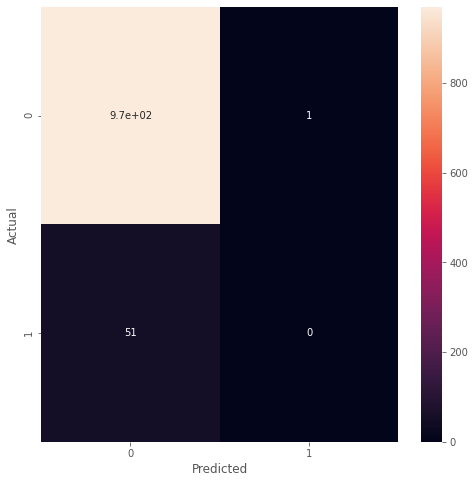

In [115]:


param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=2),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_dev)
confusion_rcv=confusion_matrix(y_dev,rcv.predict(X_dev))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_dev,y_pred_rcv))

## Variables Selection

In [116]:
newdf =  finaldf.copy()

In [117]:
newdf.shape

(5107, 34)

In [118]:
newdf.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,...,avg_glucose_level_group_Healthy,avg_glucose_level_group_High,avg_glucose_level_group_Risk,avg_glucose_level_group_Very-high,avg_glucose_level_group_low,age_level_Adult,age_level_Child,age_level_Old,age_level_Teenage,stroke
0,1.050639,0,1,2.706614,1.106076,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,0.785583,0,0,2.121817,0.023893,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,1.624926,0,1,-0.004698,0.530045,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
3,0.255471,0,0,1.437640,0.796986,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1.580750,1,0,1.501464,-0.664165,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1


In [119]:
colm = newdf.iloc[:,:-1]

In [120]:
colm.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,...,bmi_group_UnderWeight,avg_glucose_level_group_Healthy,avg_glucose_level_group_High,avg_glucose_level_group_Risk,avg_glucose_level_group_Very-high,avg_glucose_level_group_low,age_level_Adult,age_level_Child,age_level_Old,age_level_Teenage
0,1.050639,0,1,2.706614,1.106076,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0.785583,0,0,2.121817,0.023893,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,1.624926,0,1,-0.004698,0.530045,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0.255471,0,0,1.437640,0.796986,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,1.580750,1,0,1.501464,-0.664165,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [121]:
varSel = pd.DataFrame({'Variable': colm.columns})
varSel.head()

,Variable
0,age
1,hypertension
2,heart_disease
3,avg_glucose_level
4,bmi


In [122]:
X = colm

In [123]:
y = newdf['stroke']

In [124]:
print([X.shape,y.shape])

[(5107, 33), (5107,)]


### Variable Selection using Lasso

In [125]:
from sklearn.linear_model import Lasso


lassomod = Lasso(alpha=0.01).fit(X, y)

In [126]:
model = SelectFromModel(lassomod, prefit=True)
model.get_support()

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False])

In [127]:
varSel['Lasso'] = model.get_support().astype('int64')
varSel.head()

,Variable,Lasso
0,age,1
1,hypertension,0
2,heart_disease,0
3,avg_glucose_level,1
4,bmi,0


In [128]:
varSel[varSel['Lasso'] ==1]

,Variable,Lasso
0,age,1
3,avg_glucose_level,1
29,age_level_Adult,1


### Variable Selection using Random Forest

In [129]:



rfmod = RandomForestClassifier().fit(X, y)
#rfmod.feature_importances_ 

In [130]:
model = SelectFromModel(rfmod, prefit=True)
model.get_support()

array([ True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [131]:
varSel['RandomForest'] = model.get_support().astype('int64')
varSel.head()

,Variable,Lasso,RandomForest
0,age,1,1
1,hypertension,0,0
2,heart_disease,0,0
3,avg_glucose_level,1,1
4,bmi,0,1


In [132]:
varSel[varSel['RandomForest'] ==1]

,Variable,Lasso,RandomForest
0,age,1,1
3,avg_glucose_level,1,1
4,bmi,0,1


### Variable Selection using Gradient Boosting classification

In [133]:
from sklearn.ensemble import GradientBoostingClassifier


gbmod = GradientBoostingClassifier().fit(X, y)

In [134]:
model = SelectFromModel(gbmod, prefit=True)
model.get_support()

array([ True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [135]:
varSel['GradientBoost'] = model.get_support().astype('int64')
varSel.head()

,Variable,Lasso,RandomForest,GradientBoost
0,age,1,1,1
1,hypertension,0,0,0
2,heart_disease,0,0,0
3,avg_glucose_level,1,1,1
4,bmi,0,1,1


In [136]:
varSel[varSel['GradientBoost'] ==1]

,Variable,Lasso,RandomForest,GradientBoost
0,age,1,1,1
3,avg_glucose_level,1,1,1
4,bmi,0,1,1


### Variable Selection using SVM classification

In [137]:
from sklearn.svm import LinearSVC


svmmod = LinearSVC(C=0.01, penalty="l1",dual=False).fit(X, y)

In [138]:
model = SelectFromModel(svmmod, prefit=True)
model.get_support()

array([ True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False])

In [139]:
varSel['SVM'] = model.get_support().astype('int64')
varSel.head()

,Variable,Lasso,RandomForest,GradientBoost,SVM
0,age,1,1,1,1
1,hypertension,0,0,0,0
2,heart_disease,0,0,0,0
3,avg_glucose_level,1,1,1,1
4,bmi,0,1,1,0


In [140]:
varSel[varSel['SVM'] ==1]

,Variable,Lasso,RandomForest,GradientBoost,SVM
0,age,1,1,1,1
3,avg_glucose_level,1,1,1,1
8,ever_married_Yes,0,0,0,1
29,age_level_Adult,1,0,0,1


### Variable Selection using AdaBoost

In [141]:

from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier


classifier = AdaBoostClassifier()
cls = classifier.fit(X,y)

In [142]:
model = SelectFromModel(cls, prefit=True)
model.get_support()

array([ True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [143]:
varSel['AdaBoost'] = model.get_support().astype('int64')
varSel.head()

,Variable,Lasso,RandomForest,GradientBoost,SVM,AdaBoost
0,age,1,1,1,1,1
1,hypertension,0,0,0,0,0
2,heart_disease,0,0,0,0,0
3,avg_glucose_level,1,1,1,1,1
4,bmi,0,1,1,0,1


### Variable Selection using Decision Tree

In [144]:


classifier = DecisionTreeClassifier()
cls = classifier.fit(X,y)

In [145]:

model = SelectFromModel(cls, prefit=True)
model.get_support()

array([ True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [146]:
varSel['DecisionTree'] = model.get_support().astype('int64')
varSel.head()

,Variable,Lasso,RandomForest,GradientBoost,SVM,AdaBoost,DecisionTree
0,age,1,1,1,1,1,1
1,hypertension,0,0,0,0,0,0
2,heart_disease,0,0,0,0,0,0
3,avg_glucose_level,1,1,1,1,1,1
4,bmi,0,1,1,0,1,1


In [147]:
varSel[varSel['DecisionTree'] ==1]

,Variable,Lasso,RandomForest,GradientBoost,SVM,AdaBoost,DecisionTree
0,age,1,1,1,1,1,1
3,avg_glucose_level,1,1,1,1,1,1
4,bmi,0,1,1,0,1,1
15,Residence_type_Urban,0,0,0,0,0,1


### Variable Selection using LogisticRegression

In [148]:
from sklearn.linear_model import LinearRegression,LogisticRegression

classifier = LogisticRegression()
cls = classifier.fit(X,y)

In [149]:
model = SelectFromModel(cls, prefit=True)
model.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False,  True, False])

In [150]:
varSel['LogisticRegression'] = model.get_support().astype('int64')
varSel.head()

,Variable,Lasso,RandomForest,GradientBoost,SVM,AdaBoost,DecisionTree,LogisticRegression
0,age,1,1,1,1,1,1,1
1,hypertension,0,0,0,0,0,0,1
2,heart_disease,0,0,0,0,0,0,1
3,avg_glucose_level,1,1,1,1,1,1,0
4,bmi,0,1,1,0,1,1,0


In [151]:
varSel[varSel['LogisticRegression'] ==1]

,Variable,Lasso,RandomForest,GradientBoost,SVM,AdaBoost,DecisionTree,LogisticRegression
0,age,1,1,1,1,1,1,1
1,hypertension,0,0,0,0,0,0,1
2,heart_disease,0,0,0,0,0,0,1
12,work_type_Self-employed,0,0,0,0,0,0,1
13,work_type_children,0,0,0,0,0,0,1
22,bmi_group_OverWeight,0,0,0,0,0,0,1
23,bmi_group_UnderWeight,0,0,0,0,0,0,1
27,avg_glucose_level_group_Very-high,0,0,0,0,0,0,1
31,age_level_Old,0,0,0,0,0,0,1


## Summarization and Selection of Variables

In [152]:
varSel['Sum'] =  np.sum(varSel,axis=1)
varSel.head()

,Variable,Lasso,RandomForest,GradientBoost,SVM,AdaBoost,DecisionTree,LogisticRegression,Sum
0,age,1,1,1,1,1,1,1,7
1,hypertension,0,0,0,0,0,0,1,1
2,heart_disease,0,0,0,0,0,0,1,1
3,avg_glucose_level,1,1,1,1,1,1,0,6
4,bmi,0,1,1,0,1,1,0,4


In [153]:
varSel.groupby('Sum')['Variable'].count()

Sum
0    19
1    10
2     1
4     1
6     1
7     1
Name: Variable, dtype: int64

In [154]:
varSel[varSel['Sum']>1]

,Variable,Lasso,RandomForest,GradientBoost,SVM,AdaBoost,DecisionTree,LogisticRegression,Sum
0,age,1,1,1,1,1,1,1,7
3,avg_glucose_level,1,1,1,1,1,1,0,6
4,bmi,0,1,1,0,1,1,0,4
29,age_level_Adult,1,0,0,1,0,0,0,2


### Notes: 
The selected features are age, bmi and avg_glucose_level


In [155]:
cols = varSel[varSel['Sum']>1]['Variable']
cols

0                   age
3     avg_glucose_level
4                   bmi
29      age_level_Adult
Name: Variable, dtype: object

In [156]:
cols_series = (['age','hypertension','avg_glucose_level','bmi','age_level_Adult','stroke'])


In [157]:
finaldf = finaldf[cols_series]
finaldf

,age,hypertension,avg_glucose_level,bmi,age_level_Adult,stroke
0,1.050639,0,2.706614,1.106076,0,1
1,0.785583,0,2.121817,0.023893,0,1
2,1.624926,0,-0.004698,0.530045,0,1
3,0.255471,0,1.437640,0.796986,1,1
4,1.580750,1,1.501464,-0.664165,0,1
...,...,...,...,...,...,...
5103,-1.113983,0,-0.514186,1.583760,0,0
5104,-1.334863,0,-0.067417,0.263104,0,0
5105,1.624926,1,-0.494310,-0.439372,0,0
5106,1.669102,0,0.421091,-0.355075,0,0


## Oversampling Method

### SMOTE:
ynthetic Minority Oversampling Technique (SMOTE)
This technique generates synthetic data for the minority class.
SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [158]:
X = finaldf.drop('stroke', axis=1)

In [159]:
y = finaldf.stroke

In [160]:
# import library

from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 4858, 1: 249})
Resample dataset shape Counter({1: 4858, 0: 4858})


In [161]:
df_upsampled = x_smote

In [162]:
df_upsampled['stroke'] =y_smote

In [163]:
df_upsampled.tail()

,age,hypertension,avg_glucose_level,bmi,age_level_Adult,stroke
9711,1.403530,0.0,2.108996,-0.681631,0,1
9712,1.127130,1.0,3.081937,1.910944,0,1
9713,0.630812,0.0,1.695126,-0.032606,1,1
9714,0.091225,0.0,-0.839948,0.149978,1,1
9715,1.567856,0.0,2.765171,-0.204667,0,1


# ML 

In [164]:
# Function to create ROC-AUC plot

from matplotlib import pyplot

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
# Selecting X and y

X = df_upsampled.drop('stroke',axis=1)
y = df_upsampled['stroke'].copy()

In [167]:
X.shape,y.shape

((9716, 5), (9716,))

In [168]:
# Split train and dev

X_train, X_dev, y_train, y_dev = train_test_split(X,y,test_size=0.20,random_state=2)

In [169]:
# Concating X and Y

df_train_forBalanced = pd.concat([X_train, y_train], axis=1)

In [170]:
df_train_forBalanced.head()

,age,hypertension,avg_glucose_level,bmi,age_level_Adult,stroke
2753,-1.113983,0.0,0.387081,-0.917056,0,0
2393,-0.097936,0.0,0.768480,2.468881,1,0
1365,1.271518,0.0,0.165574,-0.312927,0,0
8727,1.622328,0.0,-0.010862,-0.741849,0,1
42,1.713278,0.0,0.856155,-0.326976,0,1


In [171]:
# Checking shape of the devision

X_train.shape, X_dev.shape, y_train.shape, y_dev.shape

((7772, 5), (1944, 5), (7772,), (1944,))

# Logistic Regression

In [172]:
#Run LR model

mod1 = LogisticRegression(random_state=12)
mod1.fit(X_train,y_train)

LogisticRegression(random_state=12)

In [173]:
#preding on train set

yhat1_tr = mod1.predict(X_train)
yhat1_tr

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [174]:
#preding the propability on train set

yprob1_tr = mod1.predict_proba(X_train)
yprob1_tr

array([[0.99020347, 0.00979653],
       [0.69407309, 0.30592691],
       [0.29595054, 0.70404946],
       ...,
       [0.24253659, 0.75746341],
       [0.93969955, 0.06030045],
       [0.40577016, 0.59422984]])

In [175]:
yhat1_tr = mod1.predict(X_train)
print(pd.crosstab(y_train,yhat1_tr))
yprob1_tr = mod1.predict_proba(X_train)
print('---------------')
print(mod1.score(X_train,y_train))
print(roc_auc_score(y_train, yprob1_tr[:,1]))

col_0      0     1
stroke            
0       2807  1061
1        583  3321
---------------
0.7884714359238292
0.8558012517588622


In [176]:
yhat1_ts = mod1.predict(X_dev)
print(pd.crosstab(y_dev,yhat1_ts))
yprob1_ts = mod1.predict_proba(X_dev)
print('---------------')
print(mod1.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob1_ts[:,1]))

col_0     0    1
stroke          
0       726  264
1       170  784
---------------
0.7767489711934157
0.8506225779810686


In [177]:
res = {1:{'model':'Logistic Regression',
           'accuracy-Train':mod1.score(X_train,y_train),
           'accuracy-Dev':mod1.score(X_dev,y_dev),
           'AUC-train':roc_auc_score(y_train, yprob1_tr[:,1]),
           'AUC-dev':roc_auc_score(y_dev, yprob1_ts[:,1]),
          'Recall-train':recall_score(y_train,yhat1_tr),
          'Recall-dev':recall_score(y_dev, yhat1_ts),
          'Precision-train':precision_score(y_train,yhat1_tr),
          'Precision-dev':recall_score(y_dev, yhat1_ts),
          'F-measure-train':f1_score(y_train,yhat1_tr),
          'F-measure-dev':f1_score(y_dev, yhat1_ts)
      }}

In [178]:
res

{1: {'model': 'Logistic Regression',
  'accuracy-Train': 0.7884714359238292,
  'accuracy-Dev': 0.7767489711934157,
  'AUC-train': 0.8558012517588622,
  'AUC-dev': 0.8506225779810686,
  'Recall-train': 0.8506659836065574,
  'Recall-dev': 0.8218029350104822,
  'Precision-train': 0.7578731172980374,
  'Precision-dev': 0.8218029350104822,
  'F-measure-train': 0.8015930485155685,
  'F-measure-dev': 0.7832167832167832}}

In [179]:
#Checking roc_curve on dev

fpr, tpr, thresholds = roc_curve(y_dev, yprob1_ts[:,1])

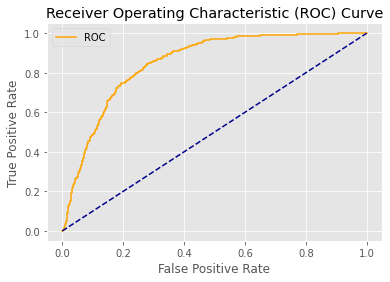

In [180]:
plot_roc_curve(fpr, tpr)

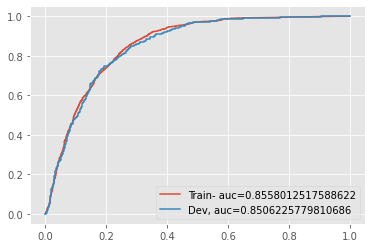

In [181]:
import matplotlib.pyplot as plt

plt.figure(0).clf()

pred = yprob1_tr[:,1]
label = y_train
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Train- auc="+str(auc))

pred = yprob1_ts[:,1]
label = y_dev
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Dev, auc="+str(auc))

plt.legend(loc=0)

### train measures

In [182]:
acc_train_rf = accuracy_score(y_train,yhat1_tr)
rf_perc_score = precision_score(y_train,yhat1_tr)
rf_rec_score= recall_score(y_train,yhat1_tr)
rf_f1_score = f1_score(y_train,yhat1_tr)

In [183]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_train_rf)

Precision: 0.758
Recall: 0.851
F-measure: 0.802
accuracy_score: 0.788


### dev

In [184]:
acc_dev_rf = accuracy_score(y_dev,yhat1_ts)
rf_perc_score = precision_score(y_dev,yhat1_ts)
rf_rec_score= recall_score(y_dev,yhat1_ts)
rf_f1_score = f1_score(y_dev,yhat1_ts)

In [185]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_dev_rf)

Precision: 0.748
Recall: 0.822
F-measure: 0.783
accuracy_score: 0.777


# Decision Tree Model

In [186]:
mod2 = DecisionTreeClassifier(random_state=1)
mod2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [187]:
yhat2_tr = mod2.predict(X_train)
print(pd.crosstab(y_train,yhat2_tr))
yprob2_tr = mod2.predict_proba(X_train)
print('---------------')
print(mod2.score(X_train,y_train))
print(roc_auc_score(y_train, yprob2_tr[:,1]))

col_0      0     1
stroke            
0       3868     0
1          0  3904
---------------
1.0
1.0


In [188]:
yhat2_ts = mod2.predict(X_dev)
print(pd.crosstab(y_dev,yhat2_ts))
yprob2_ts = mod2.predict_proba(X_dev)
print('---------------')
print(mod2.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob2_ts[:,1]))

col_0     0    1
stroke          
0       891   99
1        81  873
---------------
0.9074074074074074
0.9075471698113208


In [189]:
res[2] = {'model':'Decision Tree',
           'accuracy-Train':mod2.score(X_train,y_train),
           'accuracy-Dev':mod2.score(X_dev,y_dev),
           'AUC-train':roc_auc_score(y_train, yprob2_tr[:,1]),
           'AUC-dev':roc_auc_score(y_dev, yprob2_ts[:,1]),
          'Recall-train':recall_score(y_train,yhat2_tr),
          'Recall-dev':recall_score(y_dev, yhat2_ts),
          'Precision-train':precision_score(y_train,yhat2_tr),
          'Precision-dev':recall_score(y_dev, yhat2_ts),
          'F-measure-train':f1_score(y_train,yhat2_tr),
          'F-measure-dev':f1_score(y_dev, yhat2_ts)
         }

In [190]:
res[2]

{'model': 'Decision Tree',
 'accuracy-Train': 1.0,
 'accuracy-Dev': 0.9074074074074074,
 'AUC-train': 1.0,
 'AUC-dev': 0.9075471698113208,
 'Recall-train': 1.0,
 'Recall-dev': 0.9150943396226415,
 'Precision-train': 1.0,
 'Precision-dev': 0.9150943396226415,
 'F-measure-train': 1.0,
 'F-measure-dev': 0.9065420560747663}

In [191]:
fpr, tpr, thresholds = roc_curve(y_dev, yprob2_ts[:,1])

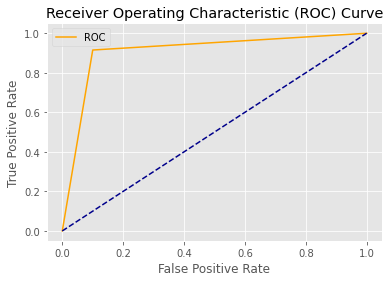

In [192]:
plot_roc_curve(fpr, tpr)

### train measures

In [193]:
acc_train_rf = accuracy_score(y_train,yhat2_tr)
rf_perc_score = precision_score(y_train,yhat2_tr)
rf_rec_score= recall_score(y_train,yhat2_tr)
rf_f1_score = f1_score(y_train,yhat2_tr)

In [194]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_train_rf)

Precision: 1.000
Recall: 1.000
F-measure: 1.000
accuracy_score: 1.000


### dev

In [195]:
acc_dev_rf = accuracy_score(y_dev,yhat2_ts)
rf_perc_score = precision_score(y_dev,yhat2_ts)
rf_rec_score= recall_score(y_dev,yhat2_ts)
rf_f1_score = f1_score(y_dev,yhat2_ts)

In [196]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_dev_rf)

Precision: 0.898
Recall: 0.915
F-measure: 0.907
accuracy_score: 0.907


# Random Forest Model

In [197]:
mod3 = RandomForestClassifier(random_state=28)
mod3.fit(X_train,y_train)

RandomForestClassifier(random_state=28)

In [198]:
yhat3_tr = mod3.predict(X_train)
print(pd.crosstab(y_train,yhat3_tr))
yprob3_tr = mod3.predict_proba(X_train)
print('---------------')
print(mod3.score(X_train,y_train))
print(roc_auc_score(y_train, yprob3_tr[:,1]))

col_0      0     1
stroke            
0       3868     0
1          0  3904
---------------
1.0
1.0


In [199]:
yhat3_ts = mod3.predict(X_dev)
print(pd.crosstab(y_dev,yhat3_ts))
yprob3_ts = mod3.predict_proba(X_dev)
print('---------------')
print(mod3.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob3_ts[:,1]))

col_0     0    1
stroke          
0       900   90
1        44  910
---------------
0.9310699588477366
0.9829452809012558


In [200]:
res[3] = {'model':'Random Forest',
           'accuracy-Train':mod3.score(X_train,y_train),
           'accuracy-Dev':mod3.score(X_dev,y_dev),
           'AUC-train':roc_auc_score(y_train, yprob3_tr[:,1]),
           'AUC-dev':roc_auc_score(y_dev, yprob3_ts[:,1]),
          'Recall-train':recall_score(y_train,yhat3_tr),
          'Recall-dev':recall_score(y_dev, yhat3_ts),
          'Precision-train':precision_score(y_train,yhat3_tr),
          'Precision-dev':recall_score(y_dev, yhat3_ts),
          'F-measure-train':f1_score(y_train,yhat3_tr),
          'F-measure-dev':f1_score(y_dev, yhat3_ts)
         }

In [201]:
res[3]

{'model': 'Random Forest',
 'accuracy-Train': 1.0,
 'accuracy-Dev': 0.9310699588477366,
 'AUC-train': 1.0,
 'AUC-dev': 0.9829452809012558,
 'Recall-train': 1.0,
 'Recall-dev': 0.9538784067085954,
 'Precision-train': 1.0,
 'Precision-dev': 0.9538784067085954,
 'F-measure-train': 1.0,
 'F-measure-dev': 0.9314227226202662}

In [202]:

fpr, tpr, thresholds = roc_curve(y_dev, yprob3_ts[:,1])

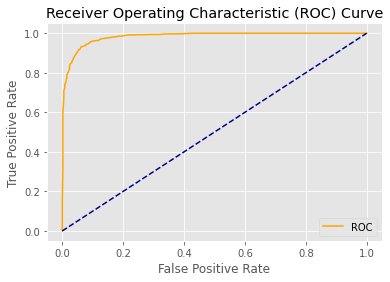

In [203]:
plot_roc_curve(fpr, tpr)

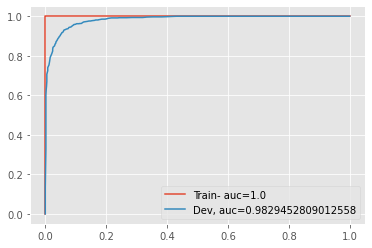

In [204]:
import matplotlib.pyplot as plt

plt.figure(0).clf()

pred = yprob3_tr[:,1]
label = y_train
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Train- auc="+str(auc))

pred = yprob3_ts[:,1]
label = y_dev
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Dev, auc="+str(auc))

plt.legend(loc=0)

### train measures

In [205]:
acc_train_rf = accuracy_score(y_train,yhat3_tr)
rf_perc_score = precision_score(y_train,yhat3_tr)
rf_rec_score= recall_score(y_train,yhat3_tr)
rf_f1_score = f1_score(y_train,yhat3_tr)

In [206]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_train_rf)

Precision: 1.000
Recall: 1.000
F-measure: 1.000
accuracy_score: 1.000


### dev

In [207]:
acc_dev_rf = accuracy_score(y_dev,yhat3_ts)
rf_perc_score = precision_score(y_dev,yhat3_ts)
rf_rec_score= recall_score(y_dev,yhat3_ts)
rf_f1_score = f1_score(y_dev,yhat3_ts)

In [208]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_dev_rf)

Precision: 0.910
Recall: 0.954
F-measure: 0.931
accuracy_score: 0.931


              precision    recall  f1-score   support

           0       0.96      0.91      0.93       990
           1       0.91      0.96      0.94       954

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944



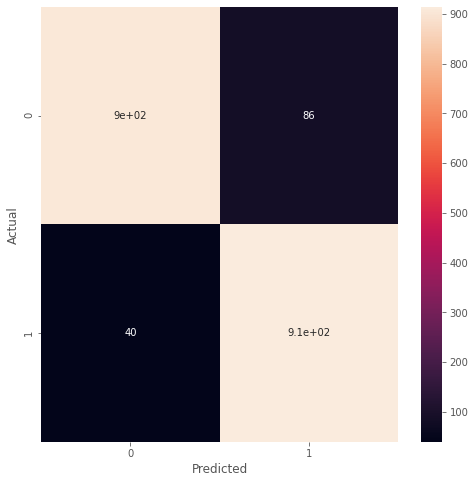

In [209]:

param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=2),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_dev)
confusion_rcv=confusion_matrix(y_dev,rcv.predict(X_dev))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_dev,y_pred_rcv))

# AdaBoost

In [210]:
mod4 = AdaBoostClassifier(random_state=120)
mod4.fit(X_train,y_train)

AdaBoostClassifier(random_state=120)

In [211]:
yhat4_tr = mod4.predict(X_train)
print(pd.crosstab(y_train,yhat4_tr))
yprob4_tr = mod4.predict_proba(X_train)
print('---------------')
print(mod4.score(X_train,y_train))
print(roc_auc_score(y_train, yprob4_tr[:,1]))

col_0      0     1
stroke            
0       2908   960
1        456  3448
---------------
0.817807514153371
0.9043557134410971


In [212]:
yhat4_ts = mod4.predict(X_dev)
print(pd.crosstab(y_dev,yhat4_ts))
yprob4_ts = mod4.predict_proba(X_dev)
print('---------------')
print(mod4.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob4_ts[:,1]))

col_0     0    1
stroke          
0       756  234
1       128  826
---------------
0.8137860082304527
0.889069415327277


In [213]:
res[4] = {'model':'AdaBoost',
           'accuracy-Train':mod4.score(X_train,y_train),
           'accuracy-Dev':mod4.score(X_dev,y_dev),
           'AUC-train':roc_auc_score(y_train, yprob4_tr[:,1]),
           'AUC-dev':roc_auc_score(y_dev, yprob4_ts[:,1]),
          'Recall-train':recall_score(y_train,yhat4_tr),
          'Recall-dev':recall_score(y_dev, yhat4_ts),
          'Precision-train':precision_score(y_train,yhat4_tr),
          'Precision-dev':recall_score(y_dev, yhat4_ts),
          'F-measure-train':f1_score(y_train,yhat4_tr),
          'F-measure-dev':f1_score(y_dev, yhat4_ts)
         }

In [214]:
res[4]

{'model': 'AdaBoost',
 'accuracy-Train': 0.817807514153371,
 'accuracy-Dev': 0.8137860082304527,
 'AUC-train': 0.9043557134410971,
 'AUC-dev': 0.889069415327277,
 'Recall-train': 0.8831967213114754,
 'Recall-dev': 0.8658280922431866,
 'Precision-train': 0.7822141560798548,
 'Precision-dev': 0.8658280922431866,
 'F-measure-train': 0.8296438883541867,
 'F-measure-dev': 0.82025819265144}

In [215]:
fpr, tpr, thresholds = roc_curve(y_dev, yprob4_ts[:,1])

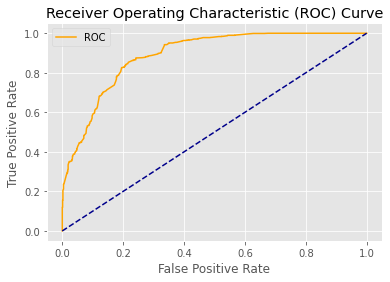

In [216]:
plot_roc_curve(fpr, tpr)

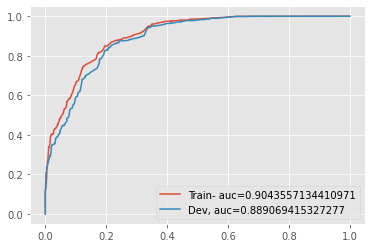

In [217]:
import matplotlib.pyplot as plt

plt.figure(0).clf()

pred = yprob4_tr[:,1]
label = y_train
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Train- auc="+str(auc))

pred = yprob4_ts[:,1]
label = y_dev
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Dev, auc="+str(auc))

plt.legend(loc=0)

### train measures

In [218]:
acc_train_rf = accuracy_score(y_train,yhat4_tr)
rf_perc_score = precision_score(y_train,yhat4_tr)
rf_rec_score= recall_score(y_train,yhat4_tr)
rf_f1_score = f1_score(y_train,yhat4_tr)

In [219]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_train_rf)

Precision: 0.782
Recall: 0.883
F-measure: 0.830
accuracy_score: 0.818


### dev

In [220]:
acc_dev_rf = accuracy_score(y_dev,yhat4_ts)
rf_perc_score = precision_score(y_dev,yhat4_ts)
rf_rec_score= recall_score(y_dev,yhat4_ts)
rf_f1_score = f1_score(y_dev,yhat4_ts)

In [221]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_dev_rf)

Precision: 0.779
Recall: 0.866
F-measure: 0.820
accuracy_score: 0.814


In [222]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)


Precision: 0.779
Recall: 0.866
F-measure: 0.820


              precision    recall  f1-score   support

           0       0.85      0.79      0.82       990
           1       0.80      0.85      0.82       954

    accuracy                           0.82      1944
   macro avg       0.82      0.82      0.82      1944
weighted avg       0.82      0.82      0.82      1944



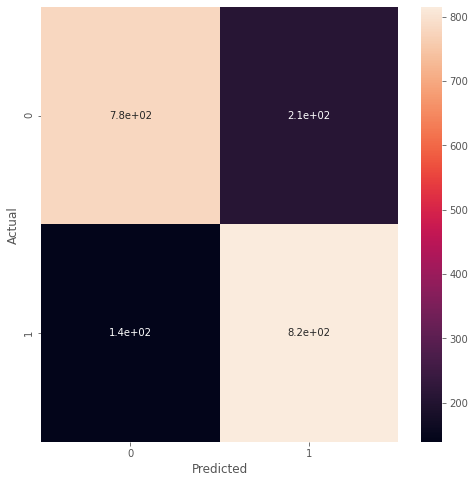

In [223]:


param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(AdaBoostClassifier(random_state=2),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_dev)
confusion_rcv=confusion_matrix(y_dev,rcv.predict(X_dev))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_dev,y_pred_rcv))

# Gradient Boosting Machine

In [224]:
mod5 = GradientBoostingClassifier(random_state=4)
mod5.fit(X_train,y_train)

GradientBoostingClassifier(random_state=4)

In [225]:
yhat5_tr = mod5.predict(X_train)
print(pd.crosstab(y_train,yhat5_tr))
yprob5_tr = mod5.predict_proba(X_train)
print('---------------')
print(mod5.score(X_train,y_train))
print(roc_auc_score(y_train, yprob5_tr[:,1]))

col_0      0     1
stroke            
0       3161   707
1        325  3579
---------------
0.8672156459083891
0.9515536792005018


In [226]:
yhat5_ts = mod5.predict(X_dev)
print(pd.crosstab(y_dev,yhat5_ts))
yprob5_ts = mod5.predict_proba(X_dev)
print('---------------')
print(mod5.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob5_ts[:,1]))

col_0     0    1
stroke          
0       803  187
1       102  852
---------------
0.8513374485596708
0.9405718611693453


In [227]:
res[5] = {'model':'Gradient Boosting Machine',
           'accuracy-Train':mod5.score(X_train,y_train),
           'accuracy-Dev':mod5.score(X_dev,y_dev),
           'AUC-train':roc_auc_score(y_train, yprob5_tr[:,1]),
           'AUC-dev':roc_auc_score(y_dev, yprob5_ts[:,1]),
          'Recall-train':recall_score(y_train,yhat5_tr),
          'Recall-dev':recall_score(y_dev, yhat5_ts),
          'Precision-train':precision_score(y_train,yhat5_tr),
          'Precision-dev':recall_score(y_dev, yhat5_ts),
          'F-measure-train':f1_score(y_train,yhat5_tr),
          'F-measure-dev':f1_score(y_dev, yhat5_ts)
         }

In [228]:
res[5]

{'model': 'Gradient Boosting Machine',
 'accuracy-Train': 0.8672156459083891,
 'accuracy-Dev': 0.8513374485596708,
 'AUC-train': 0.9515536792005018,
 'AUC-dev': 0.9405718611693453,
 'Recall-train': 0.9167520491803278,
 'Recall-dev': 0.8930817610062893,
 'Precision-train': 0.8350443303779748,
 'Precision-dev': 0.8930817610062893,
 'F-measure-train': 0.873992673992674,
 'F-measure-dev': 0.8549924736578024}

In [229]:


fpr, tpr, thresholds = roc_curve(y_dev, yprob5_ts[:,1])

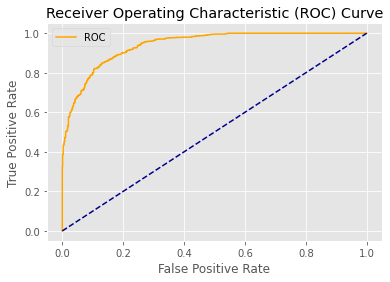

In [230]:
plot_roc_curve(fpr, tpr)

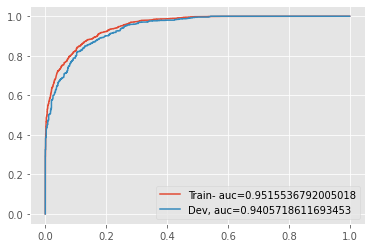

In [231]:
import matplotlib.pyplot as plt

plt.figure(0).clf()

pred = yprob5_tr[:,1]
label = y_train
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Train- auc="+str(auc))

pred = yprob5_ts[:,1]
label = y_dev
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Dev, auc="+str(auc))

plt.legend(loc=0)

### train measures

In [232]:
acc_train_rf = accuracy_score(y_train,yhat5_tr)
rf_perc_score = precision_score(y_train,yhat5_tr)
rf_rec_score= recall_score(y_train,yhat5_tr)
rf_f1_score = f1_score(y_train,yhat5_tr)

In [233]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_train_rf)

Precision: 0.835
Recall: 0.917
F-measure: 0.874
accuracy_score: 0.867


### dev

In [234]:
acc_dev_rf = accuracy_score(y_dev,yhat5_ts)
rf_perc_score = precision_score(y_dev,yhat5_ts)
rf_rec_score= recall_score(y_dev,yhat5_ts)
rf_f1_score = f1_score(y_dev,yhat5_ts)

In [235]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_dev_rf)

Precision: 0.820
Recall: 0.893
F-measure: 0.855
accuracy_score: 0.851


              precision    recall  f1-score   support

           0       0.92      0.91      0.92       990
           1       0.91      0.92      0.91       954

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944



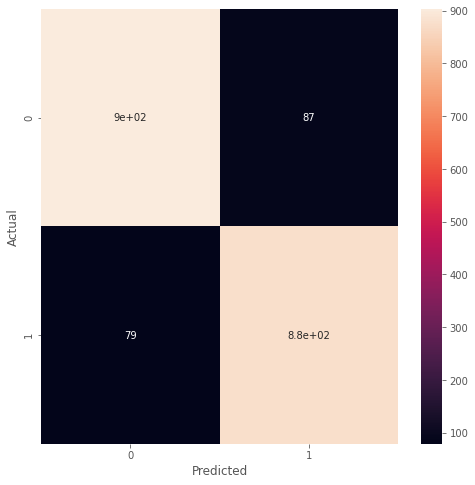

In [236]:
# Using param grid

param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(GradientBoostingClassifier(random_state=2),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_dev)
confusion_rcv=confusion_matrix(y_dev,rcv.predict(X_dev))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_dev,y_pred_rcv))

# Catboost

In [237]:
#!pip install catboost
from catboost import CatBoostClassifier 

In [238]:
mod6 = CatBoostClassifier (iterations=100, depth=7, learning_rate=0.1)
mod6.fit(X_train,y_train)

0:	learn: 0.6550236	total: 147ms	remaining: 14.5s
1:	learn: 0.6234492	total: 150ms	remaining: 7.33s
2:	learn: 0.5954737	total: 153ms	remaining: 4.93s
3:	learn: 0.5733910	total: 154ms	remaining: 3.7s
4:	learn: 0.5537734	total: 157ms	remaining: 2.98s
5:	learn: 0.5378272	total: 161ms	remaining: 2.52s
6:	learn: 0.5224151	total: 164ms	remaining: 2.18s
7:	learn: 0.5078269	total: 167ms	remaining: 1.92s
8:	learn: 0.4955016	total: 170ms	remaining: 1.72s
9:	learn: 0.4851600	total: 173ms	remaining: 1.55s
10:	learn: 0.4752926	total: 176ms	remaining: 1.42s
11:	learn: 0.4675305	total: 179ms	remaining: 1.31s
12:	learn: 0.4602067	total: 182ms	remaining: 1.22s
13:	learn: 0.4525961	total: 185ms	remaining: 1.13s
14:	learn: 0.4470011	total: 188ms	remaining: 1.07s
15:	learn: 0.4416515	total: 192ms	remaining: 1.01s
16:	learn: 0.4368560	total: 195ms	remaining: 952ms
17:	learn: 0.4318408	total: 198ms	remaining: 901ms
18:	learn: 0.4273111	total: 201ms	remaining: 856ms
19:	learn: 0.4233927	total: 203ms	remainin

In [239]:
yhat6_tr = mod6.predict(X_train)
print(pd.crosstab(y_train,yhat6_tr))
yprob6_tr = mod6.predict_proba(X_train)
print('---------------')
print(mod6.score(X_train,y_train))
print(roc_auc_score(y_train, yprob6_tr[:,1]))

col_0      0     1
stroke            
0       3170   698
1        293  3611
---------------
0.8724909933093155
0.9490281624552869


In [240]:
yhat6_ts = mod6.predict(X_dev)
print(pd.crosstab(y_dev,yhat6_ts))
yprob6_ts = mod6.predict_proba(X_dev)
print('---------------')
print(mod6.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob6_ts[:,1]))

col_0     0    1
stroke          
0       804  186
1        81  873
---------------
0.8626543209876543
0.9392806471422824


In [241]:
res[6] = {'model':'Cat Boosting Machine',
           'accuracy-Train':mod6.score(X_train,y_train),
           'accuracy-Dev':mod6.score(X_dev,y_dev),
           'AUC-train':roc_auc_score(y_train, yprob6_tr[:,1]),
           'AUC-dev':roc_auc_score(y_dev, yprob6_ts[:,1]),
          'Recall-train':recall_score(y_train,yhat6_tr),
          'Recall-dev':recall_score(y_dev, yhat6_ts),
          'Precision-train':precision_score(y_train,yhat6_tr),
          'Precision-dev':recall_score(y_dev, yhat6_ts),
          'F-measure-train':f1_score(y_train,yhat6_tr),
          'F-measure-dev':f1_score(y_dev, yhat6_ts)
         }

In [242]:
res[6]

{'model': 'Cat Boosting Machine',
 'accuracy-Train': 0.8724909933093155,
 'accuracy-Dev': 0.8626543209876543,
 'AUC-train': 0.9490281624552869,
 'AUC-dev': 0.9392806471422824,
 'Recall-train': 0.9249487704918032,
 'Recall-dev': 0.9150943396226415,
 'Precision-train': 0.8380134601995822,
 'Precision-dev': 0.9150943396226415,
 'F-measure-train': 0.8793376354559844,
 'F-measure-dev': 0.8673621460506706}

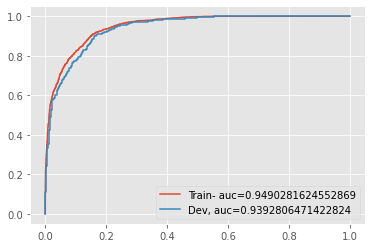

In [243]:


plt.figure(0).clf()

pred = yprob6_tr[:,1]
label = y_train
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Train- auc="+str(auc))

pred = yprob6_ts[:,1]
label = y_dev
fpr, tpr, thresh = roc_curve(label, pred)
auc = roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="Dev, auc="+str(auc))

plt.legend(loc=0)

Learning rate set to 0.350621
0:	learn: 0.5764605	total: 4.4ms	remaining: 216ms
1:	learn: 0.5186390	total: 7.63ms	remaining: 183ms
2:	learn: 0.4793675	total: 10.2ms	remaining: 160ms
3:	learn: 0.4558568	total: 14.3ms	remaining: 165ms
4:	learn: 0.4382500	total: 18.8ms	remaining: 169ms
5:	learn: 0.4230008	total: 22ms	remaining: 161ms
6:	learn: 0.4125317	total: 25.5ms	remaining: 157ms
7:	learn: 0.4038964	total: 28.7ms	remaining: 151ms
8:	learn: 0.3981689	total: 32.8ms	remaining: 149ms
9:	learn: 0.3927424	total: 36.8ms	remaining: 147ms
10:	learn: 0.3891132	total: 41.1ms	remaining: 146ms
11:	learn: 0.3850883	total: 44.6ms	remaining: 141ms
12:	learn: 0.3825144	total: 49ms	remaining: 139ms
13:	learn: 0.3779473	total: 52.3ms	remaining: 134ms
14:	learn: 0.3748797	total: 55.1ms	remaining: 129ms
15:	learn: 0.3712423	total: 59.4ms	remaining: 126ms
16:	learn: 0.3658561	total: 63.1ms	remaining: 122ms
17:	learn: 0.3609407	total: 66.7ms	remaining: 119ms
18:	learn: 0.3573066	total: 69.6ms	remaining: 114

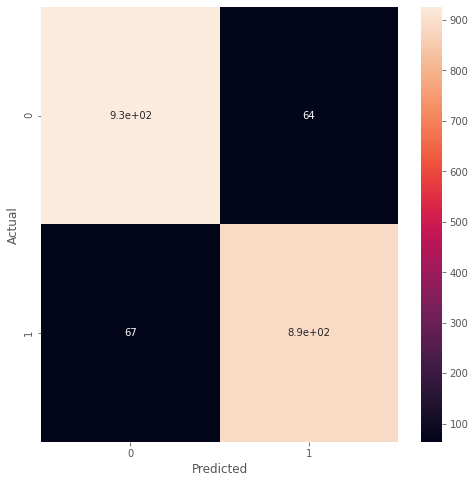

In [244]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(CatBoostClassifier(random_state=2),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_dev)
confusion_rcv=confusion_matrix(y_dev,rcv.predict(X_dev))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_dev,y_pred_rcv))

### train measures

In [245]:
acc_train_rf = accuracy_score(y_train,yhat6_tr)
rf_perc_score = precision_score(y_train,yhat6_tr)
rf_rec_score= recall_score(y_train,yhat6_tr)
rf_f1_score = f1_score(y_train,yhat6_tr)

In [246]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_train_rf)

Precision: 0.838
Recall: 0.925
F-measure: 0.879
accuracy_score: 0.872


### dev

In [247]:
acc_dev_rf = accuracy_score(y_dev,yhat6_ts)
rf_perc_score = precision_score(y_dev,yhat6_ts)
rf_rec_score= recall_score(y_dev,yhat6_ts)
rf_f1_score = f1_score(y_dev,yhat6_ts)

In [248]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)
print('accuracy_score: %.3f' % acc_dev_rf)

Precision: 0.824
Recall: 0.915
F-measure: 0.867
accuracy_score: 0.863


# Model Selection

In [249]:
df_upsample_AUC = pd.DataFrame.from_dict(res,orient='index').sort_values(by='AUC-dev',ascending=False)

In [250]:
df_upsample_AUC[['model','AUC-train','AUC-dev']]

,model,AUC-train,AUC-dev
3,Random Forest,1.000000,0.982945
5,Gradient Boosting Machine,0.951554,0.940572
6,Cat Boosting Machine,0.949028,0.939281
2,Decision Tree,1.000000,0.907547
4,AdaBoost,0.904356,0.889069
1,Logistic Regression,0.855801,0.850623


In [251]:
df_upsample_accuracy = pd.DataFrame.from_dict(res,orient='index').sort_values(by='accuracy-Dev',ascending=False)

In [252]:
df_upsample_accuracy[['model','accuracy-Train','accuracy-Dev']]

,model,accuracy-Train,accuracy-Dev
3,Random Forest,1.000000,0.931070
2,Decision Tree,1.000000,0.907407
6,Cat Boosting Machine,0.872491,0.862654
5,Gradient Boosting Machine,0.867216,0.851337
4,AdaBoost,0.817808,0.813786
1,Logistic Regression,0.788471,0.776749


In [253]:
df_upsample_recall = pd.DataFrame.from_dict(res,orient='index').sort_values(by='Recall-dev',ascending=False)

In [254]:
df_upsample_recall[['model','Recall-train','Recall-dev']]

,model,Recall-train,Recall-dev
3,Random Forest,1.000000,0.953878
2,Decision Tree,1.000000,0.915094
6,Cat Boosting Machine,0.924949,0.915094
5,Gradient Boosting Machine,0.916752,0.893082
4,AdaBoost,0.883197,0.865828
1,Logistic Regression,0.850666,0.821803


In [255]:
df_upsample_Precision = pd.DataFrame.from_dict(res,orient='index').sort_values(by='Precision-dev',ascending=False)

In [256]:
df_upsample_Precision[['model','Precision-train','Precision-dev']]

,model,Precision-train,Precision-dev
3,Random Forest,1.000000,0.953878
2,Decision Tree,1.000000,0.915094
6,Cat Boosting Machine,0.838013,0.915094
5,Gradient Boosting Machine,0.835044,0.893082
4,AdaBoost,0.782214,0.865828
1,Logistic Regression,0.757873,0.821803


In [257]:
df_upsample_Fmeasure = pd.DataFrame.from_dict(res,orient='index').sort_values(by='F-measure-dev',ascending=False)

In [258]:
df_upsample_Fmeasure[['model','F-measure-train','F-measure-dev']]

,model,F-measure-train,F-measure-dev
3,Random Forest,1.000000,0.931423
2,Decision Tree,1.000000,0.906542
6,Cat Boosting Machine,0.879338,0.867362
5,Gradient Boosting Machine,0.873993,0.854992
4,AdaBoost,0.829644,0.820258
1,Logistic Regression,0.801593,0.783217


## Conclusion:

aw we can see, Random Rorest performing overfitting results.
i will choose Gradian boosting model.

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       990
           1       0.91      0.96      0.94       954

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944



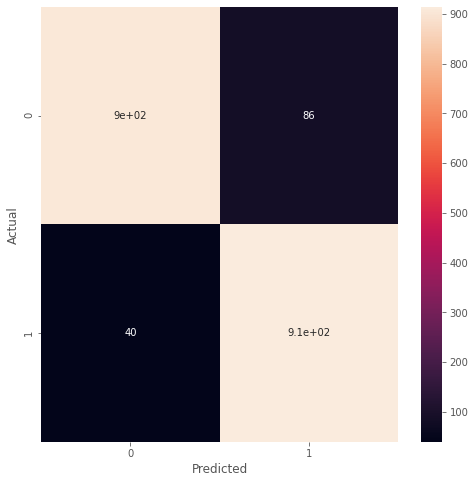

In [259]:


param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=2),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_dev)
confusion_rcv=confusion_matrix(y_dev,rcv.predict(X_dev))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_dev,y_pred_rcv))

### train

In [260]:
acc_train_rf = accuracy_score(y_train,yhat6_tr)
rf_perc_score = precision_score(y_train,yhat6_tr)
rf_rec_score= recall_score(y_train,yhat6_tr)
rf_f1_score = f1_score(y_train,yhat6_tr)

In [261]:
print('Precision_train: %.3f' %rf_perc_score )
print('Recall_tran: %.3f' % rf_rec_score)
print('F-measure_train: %.3f' % rf_f1_score)
print('accuracy_score_train: %.3f' % acc_train_rf)

Precision_train: 0.838
Recall_tran: 0.925
F-measure_train: 0.879
accuracy_score_train: 0.872


### dev

In [262]:
acc_dev_rf = accuracy_score(y_dev,y_pred_rcv)
rf_perc_score = precision_score(y_dev,y_pred_rcv)
rf_rec_score= recall_score(y_dev,y_pred_rcv)
rf_f1_score = f1_score(y_dev,y_pred_rcv)

In [263]:
print('Precision_dev: %.3f' %rf_perc_score )
print('Recall_dev: %.3f' % rf_rec_score)
print('F-measure_dev: %.3f' % rf_f1_score)
print('accuracy_score_dev: %.3f' % acc_dev_rf)

Precision_dev: 0.914
Recall_dev: 0.958
F-measure_dev: 0.936
accuracy_score_dev: 0.935


## Random Search: we decide which parameters and how (randomly)

In [264]:
# Selecting X and y

X = df_upsampled.drop('stroke',axis=1)
y = df_upsampled['stroke'].copy()

In [265]:
y = y.astype(int)

In [266]:
X.shape,y.shape

((9716, 5), (9716,))

In [267]:
# Split train and test. The "Test" df will stay out until the final model best score to be run on

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.80,random_state=2)

In [268]:
# Selecting X and y

X = df_upsampled.drop('stroke',axis=1)
y = df_upsampled['stroke'].copy()

In [269]:
X.shape,y.shape

((9716, 5), (9716,))

In [270]:
# Split train and test. The "Test" df will stay out until the final model best score to be run on

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [271]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [272]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]}


In [273]:
# i will use RandomForestRegressor-  random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, 
                               verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [274]:
# Checking the best param from the regressor

(rf_random.best_params_)

{'n_estimators': 300,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [275]:
# Function to evaluate the predictions & MAE (Mean Absolute Error)

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mae = 100 * np.mean(errors)
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}'.format(np.mean(errors)))
    return mae

In [276]:
# Changong datatypes to int

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [277]:
#### Run base model

In [278]:
base_model = LogisticRegression(random_state=1)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Mean Absolute Error: 0.2233


In [279]:
#### Compare fine-tunned model

In [280]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Mean Absolute Error: 0.1140


In [281]:
print('Improvement of {:0.2f}%.'.format( 100 * (base_accuracy - random_accuracy) / base_accuracy))

Improvement of 48.92%.


# Final

In [282]:
# Selecting X and y

X = df_upsampled.drop('stroke',axis=1)
y = df_upsampled['stroke'].copy()

In [283]:
X.shape,y.shape

((9716, 5), (9716,))

In [284]:
# Split train and test. The "Test" df will stay out until the final model best score to be run on

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [285]:
# Split train and dev

X_train, X_dev, y_train, y_dev = train_test_split(X_train,y_train,test_size=0.20,random_state=2)

In [286]:
X_train.shape, X_dev.shape, y_train.shape, y_dev.shape,X_test.shape, y_test.shape

((6217, 5), (1555, 5), (6217,), (1555,), (1944, 5), (1944,))

In [287]:
df_train_forBalanced = pd.concat([X_train, y_train], axis=1)

In [288]:
# Class count
count_class_0, count_class_1 = df_train_forBalanced['stroke'].value_counts()

# Divide by class
df_class_0 = df_train_forBalanced[df_train_forBalanced['stroke']== 0]
df_class_1 = df_train_forBalanced[df_train_forBalanced['stroke'] == 1]

Random under-sampling:
1    3124
0    3093
Name: stroke, dtype: int64


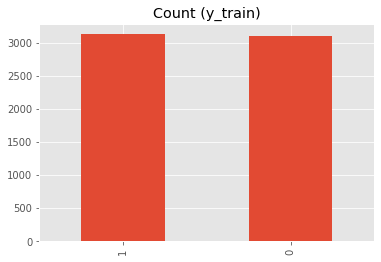

In [289]:
df_class_0_over = df_class_0.sample(count_class_1)
df_train_upsample = pd.concat([df_class_0_over, df_class_1], axis=0)

print('Random under-sampling:')
print(df_train_upsample['stroke'].value_counts())

df_train_upsample['stroke'].value_counts().plot(kind='bar', title='Count (y_train)');

In [290]:
df_train_upsample.head()

,age,hypertension,avg_glucose_level,bmi,age_level_Adult,stroke
906,1.094815,0.0,-0.531633,0.909383,0,0
643,1.624926,0.0,-0.597224,-0.832759,0,0
673,0.653055,0.0,-0.633222,-0.158382,1,0
3498,-0.716400,0.0,-0.262423,-0.523670,1,0
3800,-0.672224,0.0,-0.809014,0.853185,1,0


In [291]:
# back to X_train, y_train

X_train = df_train_upsample.iloc[:,:-1]
y_train = df_train_upsample['stroke']

In [292]:
final_model = RandomForestClassifier(random_state=1)
final_model.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [293]:
final_model_tr = final_model.predict(X_train)
print(pd.crosstab(y_train,final_model_tr))
yprob_final_model_tr = final_model.predict_proba(X_train)
print('---------------')
print(final_model.score(X_train,y_train))
print(roc_auc_score(y_train, yprob_final_model_tr[:,1]))

col_0      0     1
stroke            
0       3093     0
1          0  3124
---------------
1.0
1.0


In [294]:
final_model_ts = final_model.predict(X_dev)
print(pd.crosstab(y_dev,final_model_ts))
yprob_final_model_ts = final_model.predict_proba(X_dev)
print('---------------')
print(final_model.score(X_dev,y_dev))
print(roc_auc_score(y_dev, yprob_final_model_ts[:,1]))

col_0     0    1
stroke          
0       693   82
1        42  738
---------------
0.9202572347266881
0.9762200165425972


In [295]:
acc_train_rf = accuracy_score(y_train,final_model_tr)
rf_perc_score = precision_score(y_train,final_model_tr)
rf_rec_score= recall_score(y_train,final_model_tr)
rf_f1_score = f1_score(y_train,final_model_tr)

In [296]:
print('Precision_train: %.3f' %rf_perc_score )
print('Recall_tran: %.3f' % rf_rec_score)
print('F-measure_train: %.3f' % rf_f1_score)
print('accuracy_score_train: %.3f' % acc_train_rf)

Precision_train: 1.000
Recall_tran: 1.000
F-measure_train: 1.000
accuracy_score_train: 1.000


### dev

In [297]:
acc_dev_rf = accuracy_score(y_dev,final_model_ts)
rf_perc_score = precision_score(y_dev,final_model_ts)
rf_rec_score= recall_score(y_dev,final_model_ts)
rf_f1_score = f1_score(y_dev,final_model_ts)

In [298]:
print('Precision_dev: %.3f' %rf_perc_score )
print('Recall_dev: %.3f' % rf_rec_score)
print('F-measure_dev: %.3f' % rf_f1_score)
print('accuracy_score_dev: %.3f' % acc_dev_rf)

Precision_dev: 0.900
Recall_dev: 0.946
F-measure_dev: 0.922
accuracy_score_dev: 0.920


# Cross Validation

## K-Fold Cross-Validation

In [299]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

X = df_upsampled.drop('stroke',axis=1)
y = df_upsampled['stroke']
logreg=RandomForestClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.87294239 0.86567164 0.93926917 0.93772517 0.93669583]
Average Cross Validation score :0.9104608396925548


## Leave One Out cross-validation
LeaveOneOut cross-validation is an exhaustive cross-validation technique in which 1 sample point is used as a validation set and the remaining n-1 samples are used as the training set.

# TEST Prediction!!!

In [300]:
final_model_ts = final_model.predict(X_test)
print(pd.crosstab(y_test,final_model_ts))
yprob_final_model_ts = final_model.predict_proba(X_test)
print('---------------')
print(final_model.score(X_test,y_test))
print(roc_auc_score(y_test, yprob_final_model_ts[:,1]))

col_0     0    1
stroke          
0       895   95
1        48  906
---------------
0.926440329218107
0.9796995108315862


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       990
           1       0.91      0.95      0.93       954

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944



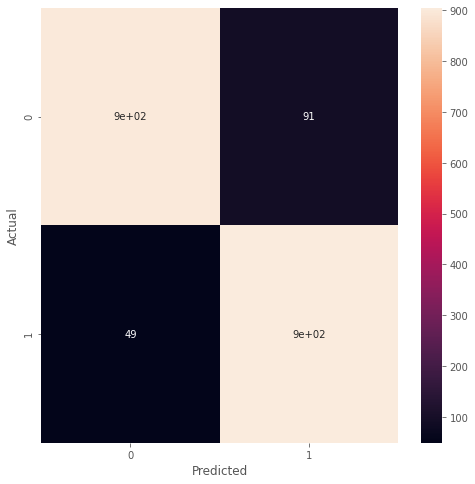

In [301]:


param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=2),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))

In [302]:

rf_perc_score = precision_score(y_test,final_model_ts)
rf_rec_score= recall_score(y_test,final_model_ts)
rf_f1_score = f1_score(y_test,final_model_ts)

In [303]:
print('Precision: %.3f' %rf_perc_score )
print('Recall: %.3f' % rf_rec_score)
print('F-measure: %.3f' % rf_f1_score)


Precision: 0.905
Recall: 0.950
F-measure: 0.927


Text(0, 0.5, 'Predictions')

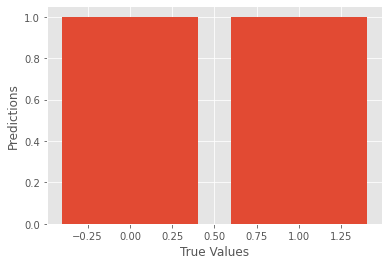

In [304]:
## The line / model
plt.bar(y_test, final_model_ts)
plt.xlabel('True Values')
plt.ylabel('Predictions')